<a href="https://colab.research.google.com/github/leandro-adal/Eleicoes2020-AL/blob/main/Projeto_VS_Elei%C3%A7%C3%B5es_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eleições Municipais 2020**

Fonte dos dados: [Dados abertos - TSE](https://dadosabertos.tse.jus.br/)

As tabelas podem ser baixadas nos links abaixo:
1.   https://dadosabertos.tse.jus.br/dataset/comparecimento-e-abstencao-2020 - Comparecimento e Abstenção na votação de 2020
2.   https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas - Informações sobre os candidatos que disputaram a eleição em 2020
2. https://dadosabertos.tse.jus.br/dataset/resultados-2020 - Dados sobre o resultado da votação


[Notebook com a Analíse dos atributos das tabelas](https://colab.research.google.com/drive/19Vt67ldjfB35rsaxi-_dMINr6i_LiJHA#scrollTo=4wLr8LAhOiTr)

## Criando ambiente e importando bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Identificando o Perfil dos Cadidatos na Eleição Municipal de 2020 em Alagoas

## Tabelas

### Tabela 1 - Detalhes Candidatos

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

*   NR_TURNO - Número do Turno
*   CD_ELEICAO - Código único da eleição
* NM_UE - Municipio que candidato concorre
*   DS_CARGO - Cargo ao qual o candidato concorre na eleição
*   NM_CANDIDATO - Nome completo do candidato
*   NM_SOCIAL_CANDIDATO - Nome social do candidato
*   DS_DETALHE_SITUACAO_CAND - Detalhe da situação do registro de candidatura do candidato que especifica o motivo pelo qual a candidatura foi julgada como 'Apta' ou 'Inapta'. 
*   SG_PARTIDO - Sigla do partido de origem do candidato
*   DT_NASCIMENTO - Data de nascimento do candidato
*   NR_IDADE_DATA_POSSE - dade do candidato na data da posse
* DS_GENERO - Gênero do candidato 
* DS_GRAU_INSTRUCAO - 
* DS_ESTADO_CIVIL - Estado civil do candidato 
* DS_COR_RACA - Cor/raça do candidato
* DS_OCUPACAO - Ocupação do candidato
* VR_DESPESA_MAX_CAMPANHA - Valor máximo, em reais, de despesas de campanha 
declarada pelo partido para aquele candidato
* DS_SIT_TOT_TURNO - Situação de totalização do candidato, naquele turno da 
eleição, após a totalização dos votos. 
 
* ST_REELEICAO - ndica se o candidato está concorrendo ou não à reeleição



Destaques: VR_DESPESA_MAX_CAMPANHA, DS_GENERO, DS_CARGO, NM_CANDIDATO, NR_IDADE_DATA_POSSE, DS_COR_RACA, DS_OCUPACAO


**Quantidade de linhas** = 7583

**Quantidade de Municipios** =  102

**Problemas encontrados**:  

#### Lendo a tabela

In [3]:
#Tabela com dados sobre os candidatos
colunasT1 = ['NR_TURNO', 'CD_ELEICAO','NM_UE', 'DS_CARGO','NM_URNA_CANDIDATO', 'DS_SIT_TOT_TURNO', 'DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA', 'NM_CANDIDATO',
             'SQ_CANDIDATO', 'DS_SITUACAO_CANDIDATO_URNA','DS_SITUACAO_CANDIDATURA','DS_DETALHE_SITUACAO_CAND','ST_CANDIDATO_INSERIDO_URNA', 'SG_PARTIDO',
             'DT_NASCIMENTO','NR_IDADE_DATA_POSSE', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO', 'ST_REELEICAO',
             'NR_CANDIDATO']
dados_candidatos = pd.read_csv('/content/drive/My Drive/Visualização Computacional/consulta_cand_2020_AL.csv', sep=";", encoding='latin-1', usecols=colunasT1)

##### Filtros

In [4]:
# Filtrando com base no código do 1º turno da eleição ordinaria
dados_candidatos = dados_candidatos.loc[(dados_candidatos['CD_ELEICAO'] == 426) ]

In [5]:
# filtrando por vereador e prefeito
filtro_no_vice = dados_candidatos.loc[dados_candidatos['DS_CARGO'] != 'VICE-PREFEITO']

In [6]:
filtro_no_vice.shape

(7225, 24)

In [7]:
# Filtro para pegar dados de um municipo
municipio = 'ARAPIRACA'
mun_dados_cand = dados_candidatos.loc[(dados_candidatos['NM_UE'] == municipio)]

#### Visualizando a Tabela

In [8]:
dados_candidatos.head(10)

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,1,426,VIÇOSA,VEREADOR,20000673350,14555,ADEILTON ALEXANDRE FERREIRA,PAPAI FERREIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,221,MOTOBOY,19368.44,NÃO ELEITO,N,DEFERIDO,SIM
1,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM
2,1,426,ARAPIRACA,VEREADOR,20001257694,43456,MARIA JOSÉ LEITE DA SILVA,MARIA JOSÉ DA MANGABEIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,411,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,94932.72,NÃO ELEITO,N,DEFERIDO,SIM
3,1,426,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM
4,1,426,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM
5,1,426,SÃO SEBASTIÃO,VEREADOR,20000698699,77555,HENRIQUE GARCEZ DE OLIVEIRA,HENRIQUE GARCEZ,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,34383.77,SUPLENTE,N,DEFERIDO,SIM
6,1,426,PORTO REAL DO COLÉGIO,VEREADOR,20001120697,10900,CRISLANE DE CASTRO DONATO FONSECA,CRIS DE TETEIA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,999,OUTROS,15842.79,SUPLENTE,N,DEFERIDO,SIM
7,1,426,BRANQUINHA,VEREADOR,20000973119,43000,ROBSON LOPES DE SOUZA,ROBINHO DO BAR,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,278,VEREADOR,12307.75,ELEITO POR QP,N,DEFERIDO,SIM
8,1,426,CAMPO ALEGRE,VEREADOR,20000759145,14456,EDINALDO DOS SANTOS CANDIDO,IRMAO EDINALDO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,169,COMERCIANTE,24211.47,SUPLENTE,N,DEFERIDO,SIM
9,1,426,SÃO BRÁS,VEREADOR,20000744324,14444,WILLIAM DOUGLAS BEZERRA DA ROCHA,DOUGLAS DO GIRAU,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",19751.25,ELEITO POR QP,N,DEFERIDO,SIM


In [9]:
dados_candidatos.sample(10)

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
6848,1,426,PALMEIRA DOS ÍNDIOS,VEREADOR,20000804113,13666,JOSEMILTON MEDEIROS SOUTO,JÓ MOTOTÁXI,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,999,OUTROS,38797.78,SUPLENTE,N,DEFERIDO,SIM
4825,1,426,MATRIZ DE CAMARAGIBE,VEREADOR,20000699042,11777,JOSEILDA BEZERRA DE MENDONÇA,JOSEILDA PROFESSORA,APTO,DEFERIDO,...,SUPERIOR COMPLETO,CASADO(A),BRANCA,265,PROFESSOR DE ENSINO FUNDAMENTAL,19220.67,NÃO ELEITO,N,DEFERIDO,SIM
652,1,426,TEOTÔNIO VILELA,VEREADOR,20000977437,15777,ERIVAN JOAQUIM DA SILVA SOBRINHO,ERIVAN,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,169,COMERCIANTE,60195.65,SUPLENTE,N,DEFERIDO,SIM
2296,1,426,BARRA DE SANTO ANTÔNIO,VEREADOR,20001058688,11999,MARIA DA CONCEIÇÃO NASCIMENTO SILVA,NENA FILHA DA DONA LOURDES,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,44879.71,SUPLENTE,N,DEFERIDO,SIM
109,1,426,BELÉM,VEREADOR,20001081191,13111,JOSEFA OLIVEIRA MONTEIRO,ZEFINHA MONTEIRO,INAPTO,INDEFERIDO,...,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO),12307.75,NÃO ELEITO,N,INDEFERIDO COM RECURSO,SIM
5092,1,426,CHÃ PRETA,VICE-PREFEITO,20000857082,45,MOAB TENORIO CAVALCANTE,MOAB TENORIO,APTO,DEFERIDO,...,SUPERIOR INCOMPLETO,CASADO(A),PARDA,169,COMERCIANTE,-1.00,NÃO ELEITO,N,DEFERIDO,SIM
5038,1,426,ANADIA,VEREADOR,20000689174,11000,RAYMI PALMEIRA BARROS BARRETO TEIXEIRA,RAYMI BARROS,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,278,VEREADOR,25959.30,ELEITO POR QP,N,DEFERIDO,SIM
6624,1,426,PENEDO,VEREADOR,20000931308,15500,CLODOVAL SACRAMENTO SANTOS,VAL DA BANANA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,169,COMERCIANTE,30399.81,ELEITO POR MÉDIA,N,DEFERIDO,SIM
5801,1,426,MACEIÓ,VEREADOR,20000823820,51007,ARIANNY TENÓRIO CAVALCANTE,ARIANNY TENÓRIO,INAPTO,RENÚNCIA,...,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,132,PSICÓLOGO,251112.20,#NULO#,N,#NULO#,NÃO
4316,1,426,MACEIÓ,VEREADOR,20001256565,14123,MARILDA MONTEIRO,MARILDA CABELEIREIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,257,EMPRESÁRIO,251112.20,NÃO ELEITO,N,DEFERIDO,SIM


### Tabela 2 - Votos recebidos por cada cadidato - 1º turno

#### Atributos da tabela

Pricipais atributos do dataset: 

* str - **CD_ELEICAO** - código da eleição
* str - **DS_CARGO** = Prefeito ou Vereador
* str - **SG_UE** - número do municipio
* int - **SQ_CANDIDATO** - número sequencial gerado pelos sistemas eleitorais
* str - **NM_UE** - nome da unidade eleitoral do candidato
* str -  **NM_CANDIDATO** - nome do cadidato
* int -   **nr_turno** = o turno em que foram resgistrados os dados
* int -  **nr_zona** - número da zona eleitoral
* str  **sg_partido** = sigla do partido do cadidato
* int - **CD_SIT_TOT_TURNO** - código da situação de totalização no turno
* str -  **ds_sit_totalizacao** = eleito, nao eleito e +
* str - **NM_URNA_CANDIDATO** - nome do candidato na urna
* int -  **QT_VOTOS_NOMINAIS** = Quantidade de votos dedicados a cada candidato por Zona Eleitoral


**Quantidade de linhas**: 9337 para o estado de Alagoas

**Quantidade de Municipios**: 102, ou seja, todos os municípios do Estado

Não foram encontrados valores ausentes na tabela

#### Lendo a Tabela

In [10]:
#Tabela que contem a quantidade de votos que cada canditado recebeu por zona na eleição de 2020
#OBS: algumas cidades tem mais de uma zona eleitoral
dados_votacao_zona = pd.read_csv('/content/drive/My Drive/Visualização Computacional/votacao_candidato_munzona_2020_AL.csv', sep=";", encoding='latin-1')

In [11]:
# Pegando o 1º turno das eleições ordinarias
dados_votacao = dados_votacao_zona.loc[(dados_votacao_zona.CD_ELEICAO == 426)]

Como algumas cidades como Maceio e Arapiraca possuem mais de uma zona eleitoral é nescessario tratar os dados

#### Visualizando a Tabela

In [12]:
dados_votacao.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,2,ELEITO POR QP,N,590
1,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,3,ELEITO POR MÉDIA,N,544
2,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000075552,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,468
3,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,70,AVANTE,AVANTE,20000075658,PARTIDO ISOLADO,AVANTE,4,NÃO ELEITO,N,645
4,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,70,AVANTE,AVANTE,20000075702,PARTIDO ISOLADO,AVANTE,4,NÃO ELEITO,N,9
5,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,11,PP,PROGRESSISTAS,20000088522,PARTIDO ISOLADO,PP,5,SUPLENTE,N,0
6,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,25,DEM,Democratas,20000106784,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,1
7,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,40,PSB,Partido Socialista Brasileiro,20000106791,PARTIDO ISOLADO,PSB,4,NÃO ELEITO,N,0
8,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,14,PTB,Partido Trabalhista Brasileiro,20000130738,PARTIDO ISOLADO,PTB,2,ELEITO POR QP,N,299
9,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,11,PP,PROGRESSISTAS,20000144816,PARTIDO ISOLADO,PP,5,SUPLENTE,N,24


In [13]:
dados_votacao.sample(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
638,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,13,PT,Partido dos Trabalhadores,20000107018,PARTIDO ISOLADO,PT,5,SUPLENTE,N,29
2553,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,45,PSDB,Partido da Social Democracia Brasileira,20000150550,PARTIDO ISOLADO,PSDB,2,ELEITO POR QP,N,925
384,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,17,PSL,Partido Social Liberal,20000064827,PARTIDO ISOLADO,PSL,4,NÃO ELEITO,N,1
1748,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,11,PP,PROGRESSISTAS,20000095728,PARTIDO ISOLADO,PP,5,SUPLENTE,N,62
6773,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,13,PT,Partido dos Trabalhadores,20000099270,PARTIDO ISOLADO,PT,4,NÃO ELEITO,N,4
4297,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,25,DEM,Democratas,20000144669,PARTIDO ISOLADO,DEM,5,SUPLENTE,N,38
5597,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,15,MDB,Movimento Democrático Brasileiro,20000068447,PARTIDO ISOLADO,MDB,5,SUPLENTE,N,379
9327,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,20,PSC,Partido Social Cristão,20000064852,PARTIDO ISOLADO,PSC,5,SUPLENTE,N,636
4550,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,90,PROS,Partido Republicano da Ordem Social,20000145646,PARTIDO ISOLADO,PROS,5,SUPLENTE,N,3
7869,12/09/2022,03:56:30,2020,2,Eleição Ordinária,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,...,50,PSOL,Partido Socialismo e Liberdade,20000086396,PARTIDO ISOLADO,PSOL,4,NÃO ELEITO,N,7


### Tabela 3 - Arrecadação

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

* **(int)** - CD_TIPO_ELEICAO  - Código da eleição

* **(int)** - ST_TURNO - O indicativo se prestador de contas teve prestação para 2º turno

* **(int)** - TP_PRESTACAO_CONTAS - Tipo de entregada prestação de contas.

* **(str)** - NM_UE - Nome de Unidade Eleitoral do candidato

* **(str)** - DS_CARGO - cargo do candidado

* **(int)** - NR_CANDIDATO - Número do candidato prestador de conta

* **(str)** - NM_CANDIDATO - Nome completo do candidato

* **(int)** - NR_CPF_CANDIDATO - CPF do candidato registrado na Justiça Eleitor

* **(str)** - SG_PARTIDO - Sigla do partido do candidat

* **(str)** - DS_FONTE_RECEITA - Descrição do tipo de fonte do recurso da doação , informado pelo prestador de contas em relação à doação

* **(str)** - DS_ORIGEM_RECEITA - Descrição do o tipo de origem do recurso, informado pelo prestador de contas em relação à doação

* **(str)** - DS_NATUREZA_RECEITA - Descrição da natureza do tipo espécie do recurso da doação

* **(str)** - DS_ESPECIE_RECEITA - Descrição do tipo de espécie do recurso da doação, quando natureza do recurso for igual a financeira

* **(str)** - DS_ESFERA_PARTIDARIA_DOADOR - Descrição do tipo de esfera partidária do doador. Válido para quando doador 'Órgão partidário' 

* **(str)** - NM_MUNICIPIO_DOADOR - Descrição do município do doador, quando a esfera partidária do doador for municipal.

* **(str)** - DS_RECEITA - Descrição Resumida informada pelo prestador de contas em relação à doação.

* **(str)** - VR_RECEITA - Valor da doação em Reais (R$)

*descrições tirados do pdf que vem junto da tabela*

Quantidade de linhas: 

#### Criando a tabela

In [14]:
#Tabela com dados sobre a arrecadação para a campanha dos candidatos
colunasT2 = ['CD_ELEICAO', 'ST_TURNO', 'TP_PRESTACAO_CONTAS', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO',
             'SG_PARTIDO', 'DS_FONTE_RECEITA', 'DS_ORIGEM_RECEITA', 'DS_NATUREZA_RECEITA', 'DS_ESPECIE_RECEITA', 'DS_ESFERA_PARTIDARIA_DOADOR',
             'NM_MUNICIPIO_DOADOR', 'DS_RECEITA', 'VR_RECEITA']
dados_receitas = pd.read_csv('/content/drive/My Drive/Visualização Computacional/receitas_candidatos_2020_AL.csv', sep=";", encoding='latin-1',
                             usecols=colunasT2)

In [15]:
# Filtrando com base no código do 1º turno da eleição ordinaria e se o cadidato esta apto a ir as urnas
dados_receitas = dados_receitas.loc[(dados_receitas['CD_ELEICAO'] == 426)].reset_index(drop=True)

In [16]:
# Como o valor está escrito com string então deve-se converter para float para calculos posteriores
dados_receitas['VR_RECEITA'] = dados_receitas['VR_RECEITA'].str.replace(',', '.') # troca o , por ponto
dados_receitas['VR_RECEITA'] = dados_receitas['VR_RECEITA'].astype(float) # Convertendo para float
dados_receitas['VR_RECEITA'].unique()

array([ 750.  ,  100.  , 1045.  , ...,  535.  , 1214.39,   28.2 ])

#### Visualizando os Dados

In [17]:
dados_receitas.head(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_ESPECIE_RECEITA,DS_ESFERA_PARTIDARIA_DOADOR,NM_MUNICIPIO_DOADOR,DS_RECEITA,VR_RECEITA
0,426,1,FINAL,BOCA DA MATA,Vereador,20001212486,12000,JOSE MAURICIO DOS SANTOS,6176245427,PDT,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Depósito em espécie,#NULO#,#NULO#,#NULO#,750.0
1,426,1,FINAL,UNIÃO DOS PALMARES,Prefeito,20001186175,13,SERGIO ROGERIO OLIVEIRA DA SILVA,861010485,PT,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,100.0
2,426,1,FINAL,PILAR,Prefeito,20000750618,20,RENATO REZENDE ROCHA FILHO,3749271461,PSC,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,SERVIÇOS DE PANFLETAGEM E/OU ADESIVAÇÃO E/OU M...,1045.0
3,426,1,FINAL,LAGOA DA CANOA,Vereador,20001050232,43000,EDVANIO DE OLIVEIRA ALMEIDA,92636411453,PV,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,1130.0
4,426,1,FINAL,LAGOA DA CANOA,Vereador,20001050229,43123,JEFERSON BORGES TORRES,7272867493,PV,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,1460.0
5,426,1,FINAL,PIRANHAS,Vereador,20001015336,77456,RENATO DOUGLAS RODRIGUES JUNIOR,7585206461,SOLIDARIEDADE,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,MOBILIZAÇÃO DE RUA,875.0
6,426,1,FINAL,ATALAIA,Prefeito,20000841216,20,CECÍLIA LIMA HERRMANN ROCHA,5158296413,PSC,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,SERVIÇO DE FISCAL,100.0
7,426,1,FINAL,CAPELA,Vereador,20000836280,19777,LARISSA ALESSANDRA SANTOS DE ALMEIDA,8103441490,PODE,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,IMÓVEL CEDIDO PARA REUNIÃO,200.0
8,426,1,FINAL,TAQUARANA,Vereador,20000681896,10000,JOSEFA FARIAS SANTOS,11408576490,REPUBLICANOS,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,CESSAO VEICULO,1949.5
9,426,1,FINAL,MAR VERMELHO,Prefeito,20001042530,11,EMANUEL DA SILVA BARROS,3585555403,PP,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,DOAÇÃO DE SERVIÇOS ADMINISTRATIVOS PARA CAMPAN...,1200.0


In [18]:
dados_receitas.sample(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_NATUREZA_RECEITA,DS_ESPECIE_RECEITA,DS_ESFERA_PARTIDARIA_DOADOR,NM_MUNICIPIO_DOADOR,DS_RECEITA,VR_RECEITA
10920,426,1,FINAL,SANTANA DO IPANEMA,Vereador,20001092022,40222,ZEZITO TELES DE CARVALHO JUNIOR,5516750474,PSB,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Depósito em espécie,#NULO#,SANTANA DO IPANEMA,#NULO#,1000.00
7492,426,1,FINAL,BARRA DE SANTO ANTÔNIO,Vereador,20001001375,25000,MARTA CRISTINA RIOS DOS SANTOS,91139562487,DEM,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,CESSÃO DE UM VEICULO VW/GOL 1.0,2000.00
4620,426,1,FINAL,IGREJA NOVA,Vereador,20001032934,11111,MANOEL MESSIAS DOS SANTOS,44558538472,PP,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Transferência eletrônica,#NULO#,IGREJA NOVA,#NULO#,1225.00
2649,426,1,FINAL,INHAPI,Vereador,20001057309,11333,GILSON TENORIO CAVALCANTE,49406779404,PP,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Depósito em espécie,#NULO#,INHAPI,#NULO#,1000.00
9778,426,1,FINAL,SENADOR RUI PALMEIRA,Vereador,20000848143,15000,JOSÉ RENINSON FERREIRA DE MELO,4248051460,MDB,OUTROS RECURSOS,Recursos próprios,FINANCEIRO,Transferência eletrônica,#NULO#,SENADOR RUI PALMEIRA,#NULO#,3500.00
13982,426,1,FINAL,MATA GRANDE,Vereador,20001104689,15888,EDINEIDE NASCIMENTO PORFIRIO,99347008591,MDB,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,19.85
9270,426,1,FINAL,JUNQUEIRO,Prefeito,20000862858,14,CÍCERO LEANDRO PEREIRA DA SILVA,7778993457,PTB,OUTROS RECURSOS,Recursos de pessoas físicas,ESTIMÁVEL,Estimado,#NULO#,#NULO#,PRESTAÇÃO DE SERVIÇO DE LOCUÇÃO,350.00
18314,426,1,FINAL,TRAIPU,Prefeito,20001032287,55,SILVINO BEZERRA CAVALCANTE,21070407453,PSD,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Depósito em espécie,#NULO#,#NULO#,#NULO#,1050.00
8810,426,2,FINAL,MACEIÓ,Prefeito,20000842791,40,JOÃO HENRIQUE HOLANDA CALDAS,1117690199,PSB,FUNDO ESPECIAL,Recursos de partido político,FINANCEIRO,Transferência eletrônica,Federal (Estadual/Distrital),#NULO#,#NULO#,1000000.00
5876,426,1,FINAL,FLEXEIRAS,Prefeito,20001147731,11,SILVANA MARIA CAVALCANTE DA COSTA PINTO,29656613449,PP,OUTROS RECURSOS,Recursos de pessoas físicas,FINANCEIRO,Transferência eletrônica,#NULO#,#NULO#,#NULO#,1500.00


### Tabela 4 - Despesas Contratadas

#### Descrição dos principais atributos

**Pricipais atributos do dataset**: 

* **(int)** - CD_ELEICAO  - Código da eleição

* **(int)** - ST_TURNO - O indicativo se prestador de contas teve prestação para 2º turno

* **(int)** - TP_PRESTACAO_CONTAS - Tipo de entrega da prestação de contas. Pode assumir os valores: 0 - Final, 1 - Relatório Financeiro e 2 - Parcial.

* * Tipo 0 - Final: é o tipo de entrega final da prestação de contas, onde serão gerados os relatórios de análise, exame, diligência e conclusivo. 

* * Tipo 1 - Relatório Financeiro: prazo de 72h, após a arrecadação, em que o prestador de contas deve informar à Justiça Eleitoral as doações recebidas. 

* * Tipo 2 - Parcial: prazo no qual os prestadores de contas são obrigados a enviar à Justiça Eleitoral as prestações de contas completas para avaliação prévia, antes da análise da final. 

* **(str)** - SQ_PRESTADOR_CONTAS - Número sequencial do prestador de contas, gerado internamento pelos sistemas eleitorais para cada eleição. 

* **(str)** - NM_UE - Nome da Unidade Eleitoral do candidato prestador de 
contas.

* **(str)** - DS_CARGO - Cargo concorrido na eleição pelo candidato prestador de contas.

* **(str)** - SQ_CANDIDATO - Número sequencial do candidato, gerado internamente pelos sistemas eleitorais para cada eleição.

* **(str)** - NR_CANDIDATO - Número do candidato prestador de contas na eleição

* **(str)** - NM_CANDIDATO - Nome completo do candidato prestador de contas. 

* **(str)** - NR_CPF_CANDIDATO - Número do CPF do candidato prestador de contas

* **(str)** - SG_PARTIDO - Sigla do partido do candidato prestador de contas. 

* **(str)** - DS_TIPO_FORNECEDOR - Tipo de natureza jurídica do fornecedor, informado pelo candidato prestador de contas em relação à despesa.

* **(str)** - NM_FORNECEDOR - Nome, declarado à Justiça Eleitoral, do fornecedor de bens e/ou serviços da despesa informada pelo candidato 
prestador de contas.

* **(str)** - DS_ORIGEM_DESPESA - Descrição do tipo de origem da despesa

* **(str)** - SQ_DESPESA - Sequencial de identificação do registro da despesa

* **(str)** - DS_DESPESA - Descrição da aplicabilidade da despesa contratada, informada pelo prestador de contas.

* **(str)** - VR_DESPESA_CONTRATADA - Valor da despesa em Reais (R$)

**Quantidade de linhas: 9301**

*descrições tirados do pdf que vem junto da tabela*

#### Criando a tabela

In [19]:
#Tabela com dados sobre as despesas contratadas pelos candidatos
colunasT3 = ['CD_ELEICAO', 'ST_TURNO', 'TP_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS', 'NM_UE', 'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO',
             'NM_CANDIDATO','NR_CPF_CANDIDATO', 'SG_PARTIDO', 'NR_CNPJ_PRESTADOR_CONTA', 'DS_TIPO_FORNECEDOR', 'NM_FORNECEDOR', 'DS_ORIGEM_DESPESA',
             'SQ_DESPESA', 'DS_DESPESA', 'VR_DESPESA_CONTRATADA']
dados_despesas_contratadas = pd.read_csv('/content/drive/My Drive/Visualização Computacional/despesas_contratadas_candidatos_2020_AL.csv', sep=";",
                                         encoding='latin-1', usecols=colunasT3)

In [20]:
# Filtrando com base no código do 1º turno da eleição ordinaria e se o cadidato esta apto a ir as urnas
dados_despesas_contratadas = dados_despesas_contratadas.loc[(dados_despesas_contratadas['CD_ELEICAO'] == 426) ].reset_index(drop=True)

In [21]:
# filtro apanas o relatorio final da despesas
dados_despesas_contratadas = dados_despesas_contratadas.loc[(dados_despesas_contratadas['TP_PRESTACAO_CONTAS'] == 'Final') ].reset_index(drop=True)

In [22]:
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'] = dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].str.replace(',', '.') # troca o , por ponto
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'] = dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].astype(float) # Convertendo para float
dados_despesas_contratadas['VR_DESPESA_CONTRATADA'].unique()

array([   7.5 ,   50.  ,  100.  , ...,   35.98, 1000.8 ,  299.8 ])

#### Outros filtros

In [23]:
# Sem transferencia entre candidatos
dados_despesas_contratadas1 = dados_despesas_contratadas.loc[(dados_despesas_contratadas['DS_ORIGEM_DESPESA'] ==
                                                             'Doações financeiras a outros candidatos/partidos') ].reset_index(drop=True)

#### Visualizando os Dados

In [24]:
dados_despesas_contratadas.head(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_FORNECEDOR,NM_FORNECEDOR,DS_ORIGEM_DESPESA,SQ_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,426,1,Final,1843810734,DELMIRO GOUVEIA,38769308000179,Prefeito,20000830521,15,ELIZIANE FERREIRA COSTA,64805395400,MDB,Pessoa Jurídica,POSTO ALINE LTDA EPP,Água,39993554,COMPRA DE AGUA - CAMINHADA,7.50
1,426,1,Final,1843182235,VIÇOSA,38669055000161,Vereador,20000757944,15123,FLAVIO ALVES DE FRANÇA,5542507484,MDB,Pessoa Jurídica,I9 SOLUÇÕES GRÁFICAS LTDA,Publicidade por materiais impressos,37780866,BOTTONS,50.00
2,426,1,Final,1844842585,OLHO D'ÁGUA GRANDE,38858030000106,Vereador,20000938207,55000,KLEBERTON SANTOS DE ALCANTARA,7083590435,PSD,Pessoa Física,EDICLEI ALMEIDA DA SILVA,"Produção de jingles, vinhetas e slogans",36046286,PRODUÇAO DE UM JINGLE,100.00
3,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 62X62CM,800.00
4,426,1,Final,1846988076,PARIPUEIRA,38964489000194,Vereador,20001060946,25999,EDIANE SANTOS DA SILVA,4620716421,DEM,Pessoa Jurídica,CW MONTEIRO DE CARVALHO ME,Publicidade por materiais impressos,40806000,PUB MAT IMPRESSO,1805.05
5,426,1,Final,1843717926,SÃO MIGUEL DOS CAMPOS,38764323000124,Prefeito,20000816470,25,PEDRO RICARDO ALVES JATOBÁ,45385670430,DEM,Pessoa Física,EDILENE DE SOUZA,Atividades de militância e mobilização de rua,41039082,SERVIÇOS DE MOB DE RUAS,300.00
6,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 25X12CM,600.00
7,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 33X16CM,1000.00
8,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 9X9CM,100.00
9,426,1,Final,1841599022,TAQUARANA,38851232000126,Prefeito,20000753347,12,RAFAEL PEREIRA DE ALMEIDA,92554636400,PDT,Pessoa Jurídica,JOAO LUCAS DO NASCIMENTO ALMEIDA 10987736400,Publicidade por materiais impressos,38677841,ADESIVOS 24X24CM,60.00


In [25]:
dados_despesas_contratadas.sample(10)

,CD_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,NM_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,SG_PARTIDO,DS_TIPO_FORNECEDOR,NM_FORNECEDOR,DS_ORIGEM_DESPESA,SQ_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
62766,426,1,Final,1845332533,POÇO DAS TRINCHEIRAS,38875560000162,Vereador,20000988437,15123,MARCIO GOMES FEITOSA,3483850481,MDB,Pessoa Jurídica,#NULO#,"Encargos financeiros, taxas bancárias e/ou op....",36098678,REF. TARIFA DOC/TED,10.45
37511,426,1,Final,1849817483,CANAPI,39060443000103,Vereador,20001174929,25456,JOSIMEIRE ELISEU MALTA,7073821493,DEM,Pessoa Jurídica,MIGUEL VIEIRA LIMA NETO,Publicidade por materiais impressos,37613288,SANTINHOS,150.00
52346,426,1,Final,1844984737,ARAPIRACA,38893136000140,Prefeito,20000909917,10,FABIANA CAVALCANTE PESSOA,3585675484,REPUBLICANOS,Pessoa Física,CÍCERA FRANÇA DA SILVA,Atividades de militância e mobilização de rua,39241136,ATIV MILITÂNCIA E MOBILIZAÇÃO DE RUA NA ELEIÇÃ...,850.00
33991,426,1,Final,1832355087,MINADOR DO NEGRÃO,38569545000196,Prefeito,20000679804,12,JOSÉ EMÍLIO TENÓRIO BARROS,92667775449,PDT,Pessoa Jurídica,IRANDIR SABINO DA SILVA,Combustíveis e lubrificantes,36679946,DIESEL S10,531.21
13450,426,1,Final,1844868248,MACEIÓ,38899471000156,Vereador,20000928827,13331,ABEL AURÉLIO DUARTE FILHO,56265042491,PT,Pessoa Jurídica,A D M PAIVA ME,Publicidade por adesivos,37450664,ADESIVOS 12X40,250.00
42383,426,2,Final,1843671175,MACEIÓ,38736089000121,Prefeito,20000842791,40,JOÃO HENRIQUE HOLANDA CALDAS,1117690199,PSB,Pessoa Jurídica,#NULO#,"Encargos financeiros, taxas bancárias e/ou op....",39922518,TARIFA TRANSF RECURSO,1.20
20415,426,2,Final,1843671175,MACEIÓ,38736089000121,Prefeito,20000842791,40,JOÃO HENRIQUE HOLANDA CALDAS,1117690199,PSB,Pessoa Física,GERSSICA KAROLINY DO NASCIMENTO SOUZA,Despesas com pessoal,39923326,FISCALIZAÇÃO,150.00
53787,426,1,Final,1843253276,MAJOR ISIDORO,38668904000162,Prefeito,20000806180,11,THEOBALDO CAVALCANTI LINS NETTO,5316218477,PP,Pessoa Jurídica,GRAFPEL IND GRAFICA LTDA,Publicidade por materiais impressos,35958538,SANTINHOS 7X10CM PARA O VEREADOR CABEÇA FRIA 1...,75.56
7427,426,1,Final,1849861548,JUNDIÁ,38998513000106,Vereador,20001221918,15678,ALVARO VINICIUS ALVES DE ALBUQUERQUE,7718368483,MDB,Pessoa Jurídica,A D L ARAUJO SERVIÇOS,Publicidade por materiais impressos,37765477,SANTINHOS 6 X 9,350.00
33628,426,1,Final,1837589757,MACEIÓ,38587489000112,Prefeito,20000700015,65,CICERO PEREIRA DOS SANTOS FILHO,66270510449,PC do B,Pessoa Jurídica,JOSE CARLOS PROFIRO,Publicidade por materiais impressos,39053487,ANTANILDO DE FREITAS 65000 - FURADINHOS 0·90X0·40,125.00


### Tabela 5 - Detalhes da Votação por Municipio

#### Atributos da tabela

**Pricipais atributos do dataset**: 

*   NR_TURNO - Número do turno da eleição
* CD_ELEICAO - 426 indica as eleções municipais ordinarias no 1º turno
*   NM_MUNICIPIO - Nome do município onde ocorreu a eleição
*   NR_ZONA - Número da Zona onde ocorreu a eleição
*   DS_CARGO - Descrição do cargo do candidato
*   QT_APTOS_TOT -Quantidade de eleitores aptos nas seções totalizadas
*   QT_COMPARECIMENTO - Quantidade de eleitores que compareceram às 
eleições naquele município e zona, naquele cargo
*   QT_ABSTENCOES - Quantidade de eleitores que não compareceram às 
eleições naquele município e zona
*   ST_VOTO_EM_TRANSITO - Status que indica se o quantitativo de votos se refere a voto em trânsito
*   QT_VOTOS_NOMINAIS - Quantidade de votos nominais totalizados naquele 
município e zona
* QT_VOTOS_BRANCOS - Quantidade de votos brancos totalizados naquele 
município e zona
* QT_VOTOS_NULOS - Quantidade de votos nulos totalizados naquele 
município e zona
* QT_VOTOS_LEGENDA - Quantidade de votos em legenda totalizados naquele 
município e zona
* QT_VOTOS_ANULADOS - Quantidade de votos anulados e apurados como 
válidos naquele município e zona
* QT_VOTOS_NULO_TECNICO - Quantidade de votos nulos técnicos
* QT_VOTOS_ANULADO_SUB_JUDICE - Quantidade de votos anulados sub judice (indeferido com recurso)
* QT_VOTOS_SEM_CAND_P_VOTAR - Quantidade de votos sem candidatos para votar


-- Descrições dos atributos tiradas do arquivo read-me da tabela

**Quantidade de linhas** = 220

**Quantidade de Municipios** = 102 

**Problemas encontrados**:  

#### Lendo a Tabela

In [26]:
colunas = ['NR_TURNO','CD_ELEICAO', 'NM_MUNICIPIO', 'NR_ZONA', 'DS_CARGO', 'QT_APTOS_TOT', 'QT_COMPARECIMENTO','QT_ABSTENCOES', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
           'QT_VOTOS_BRANCOS', 'QT_VOTOS_NULOS', 'QT_VOTOS_LEGENDA', 'QT_VOTOS_ANULADOS', 'QT_VOTOS_NULO_TECNICO',  'QT_VOTOS_ANULADO_SUB_JUDICE', 'QT_VOTOS_SEM_CAND_P_VOTAR']
dados_detalhe_votacao = pd.read_csv('/content/drive/My Drive/Visualização Computacional/detalhe_votacao_munzona_2020_AL.csv', sep=";", encoding='latin-1', usecols=colunas)
dados_detalhe_votacao
# geopandas comparecimento ou a tabela cpm as seções

,NR_TURNO,CD_ELEICAO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,1,426,PARIPUEIRA,17,Prefeito,10382,8677,1705,N,8162,150,365,0,0,0,0,0
1,1,426,PARIPUEIRA,17,Vereador,10382,8677,1705,N,7862,117,260,438,0,0,0,0
2,1,426,ÁGUA BRANCA,39,Prefeito,15296,11597,3699,N,11012,96,489,0,0,0,0,0
3,1,426,ÁGUA BRANCA,39,Vereador,15296,11597,3699,N,10379,103,575,540,0,0,0,0
4,1,426,PARICONHA,39,Prefeito,8736,7046,1690,N,6690,56,300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2,427,MACEIÓ,1,Prefeito,104125,75740,28385,N,66707,2308,6725,0,0,0,0,0
216,2,427,MACEIÓ,2,Prefeito,152192,108949,43243,N,96799,3135,9015,0,0,0,0,0
217,2,427,MACEIÓ,3,Prefeito,119805,90293,29512,N,80482,2418,7393,0,0,0,0,0
218,2,427,MACEIÓ,33,Prefeito,92475,65785,26690,N,57831,2234,5720,0,0,0,0,0


In [27]:
#Pegando os votos no Primeiro Turno
#OBS: existem eleições complementares e as eleições de 2º, então filtrei pelo código das eleições ordinarias do 1ª turno
detalhe_votacao_zona = dados_detalhe_votacao[(dados_detalhe_votacao.CD_ELEICAO == 426)]
detalhe_votacao_zona

,NR_TURNO,CD_ELEICAO,NM_MUNICIPIO,NR_ZONA,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,1,426,PARIPUEIRA,17,Prefeito,10382,8677,1705,N,8162,150,365,0,0,0,0,0
1,1,426,PARIPUEIRA,17,Vereador,10382,8677,1705,N,7862,117,260,438,0,0,0,0
2,1,426,ÁGUA BRANCA,39,Prefeito,15296,11597,3699,N,11012,96,489,0,0,0,0,0
3,1,426,ÁGUA BRANCA,39,Vereador,15296,11597,3699,N,10379,103,575,540,0,0,0,0
4,1,426,PARICONHA,39,Prefeito,8736,7046,1690,N,6690,56,300,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,1,426,CRAÍBAS,31,Vereador,18372,15703,2669,N,14184,174,503,841,0,1,0,0
210,1,426,SENADOR RUI PALMEIRA,51,Prefeito,8854,6805,2049,N,6396,75,334,0,0,0,0,0
211,1,426,SENADOR RUI PALMEIRA,51,Vereador,8854,6805,2049,N,5995,43,415,352,0,0,0,0
212,1,426,TEOTÔNIO VILELA,34,Prefeito,29308,21519,7789,N,19453,687,1379,0,0,0,0,0


In [28]:
# Juntando o número de votos de zonas eleitorais diferentes no mesmo municipio e cargo
# Soma os cada tipo de voto quando 'NM_MUNICIPIO', 'DS_CARGO' são identicos
# Exclui as colunas do turno, código da eleição e zona eleitoral
new = detalhe_votacao_zona.groupby(['NM_MUNICIPIO', 'DS_CARGO']).sum().reset_index()
detalhe_votacao = new.drop(columns=['NR_TURNO', 'CD_ELEICAO', 'NR_ZONA'])
detalhe_votacao

<ipython-input-28-3196222593f3>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new = detalhe_votacao_zona.groupby(['NM_MUNICIPIO', 'DS_CARGO']).sum().reset_index()


,NM_MUNICIPIO,DS_CARGO,QT_APTOS_TOT,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS,QT_VOTOS_NULO_TECNICO,QT_VOTOS_ANULADO_SUB_JUDICE,QT_VOTOS_SEM_CAND_P_VOTAR
0,ANADIA,Prefeito,12411,9514,2897,9064,105,345,0,0,0,0,0
1,ANADIA,Vereador,12411,9514,2897,8602,100,454,358,0,0,0,0
2,ARAPIRACA,Prefeito,143187,115778,27409,108598,2467,4613,0,0,100,0,0
3,ARAPIRACA,Vereador,143187,115778,27409,102225,3149,3765,5818,0,821,0,0
4,ATALAIA,Prefeito,30331,23630,6701,22443,243,944,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,UNIÃO DOS PALMARES,Vereador,44953,34512,10441,29401,490,986,2008,0,34,1593,0
200,VIÇOSA,Prefeito,19668,15622,4046,14870,190,562,0,0,0,0,0
201,VIÇOSA,Vereador,19668,15622,4046,13870,268,542,942,0,0,0,0
202,ÁGUA BRANCA,Prefeito,15296,11597,3699,11012,96,489,0,0,0,0,0


# Visualizando os Dados sobre os Candidatos

## Agrupando os dados

#### Agrupando os dados - Tabela 2

In [29]:
# Juntando o número de votos de zonas eleitorais diferentes no mesmo municipio
cand_al = dados_votacao.groupby(['NM_UE', 'DS_CARGO', 'SQ_CANDIDATO']).agg({'NM_URNA_CANDIDATO': 'first', 'SG_PARTIDO': 'first',
                                'DS_SIT_TOT_TURNO': 'first',  'QT_VOTOS_NOMINAIS':'sum', 'NM_CANDIDATO': 'first'}).sort_values(by='QT_VOTOS_NOMINAIS',
                                                                                                                         ascending=False).reset_index()
cand_al.head(10)

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_URNA_CANDIDATO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS,NM_CANDIDATO
0,MACEIÓ,Prefeito,20000774385,ALFREDO GASPAR DE MENDONÇA,MDB,2º TURNO,110234,ALFREDO GASPAR DE MENDONÇA NETO
1,MACEIÓ,Prefeito,20000842791,JHC,PSB,2º TURNO,109053,JOÃO HENRIQUE HOLANDA CALDAS
2,MACEIÓ,Prefeito,20000699067,DAVI DAVINO FILHO,PP,NÃO ELEITO,97409,DAVID CABRAL DAVINO FILHO
3,ARAPIRACA,Prefeito,20000686605,LUCIANO BARBOSA,MDB,ELEITO,59249,JOSÉ LUCIANO BARBOSA DA SILVA
4,RIO LARGO,Prefeito,20000688388,GILBERTO GONÇALVES,PP,ELEITO,25355,GILBERTO GONÇALVES DA SILVA
5,MACEIÓ,Prefeito,20000824171,JOSAN LEITE,PATRIOTA,NÃO ELEITO,23925,JOSAN LEITE PEREIRA BARROS
6,PALMEIRA DOS ÍNDIOS,Prefeito,20000951407,JULIO CEZAR,PSB,ELEITO,21469,JULIO CEZAR DA SILVA
7,ARAPIRACA,Prefeito,20000909917,FABIANA PESSOA,REPUBLICANOS,NÃO ELEITO,20874,FABIANA CAVALCANTE PESSOA
8,ARAPIRACA,Prefeito,20000751793,TARCIZO FREIRE,PP,NÃO ELEITO,16376,TARCIZO SAMPAIO FREIRE
9,CORURIPE,Prefeito,20000702725,MARCELO BELTRÃO,PP,ELEITO,16038,MARCELO BELTRÃO SIQUEIRA


In [30]:
# 10 candidatos mais votados em seus municipios
a = cand_al.loc[cand_al['DS_CARGO'] == 'Prefeito'].drop_duplicates(subset=['NM_UE'],keep='first')

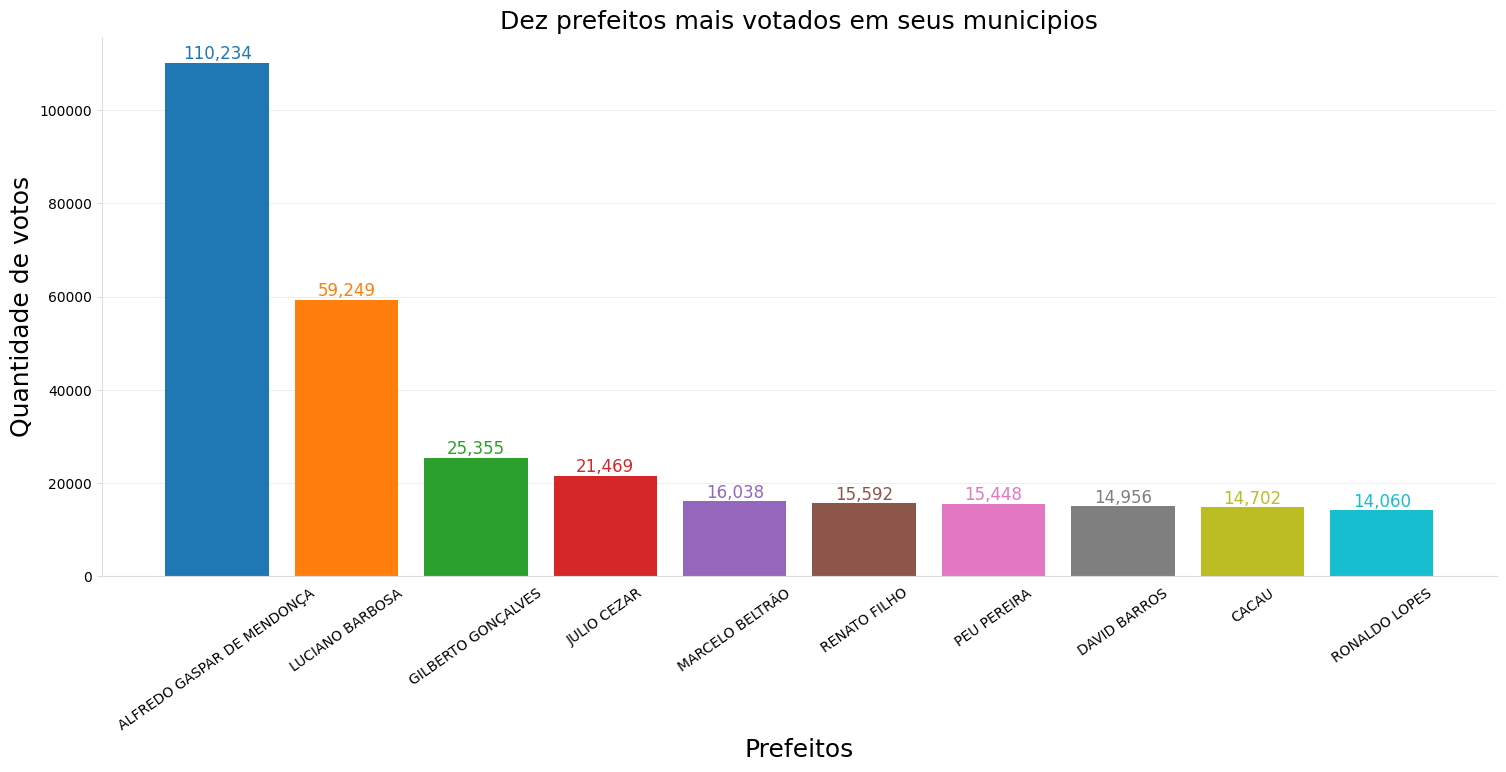

In [31]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(a.NM_URNA_CANDIDATO.head(10), a.QT_VOTOS_NOMINAIS.head(10), color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Prefeitos', {'fontsize':18})
ax.set_ylabel('Quantidade de votos', {'fontsize':18})
ax.set_title('Dez prefeitos mais votados em seus municipios', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  text = f'{bar.get_height():,}'
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height():,}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

In [32]:
b = cand_al.loc[cand_al['DS_CARGO'] == 'Vereador'].drop_duplicates(subset=['NM_UE'],keep='first')

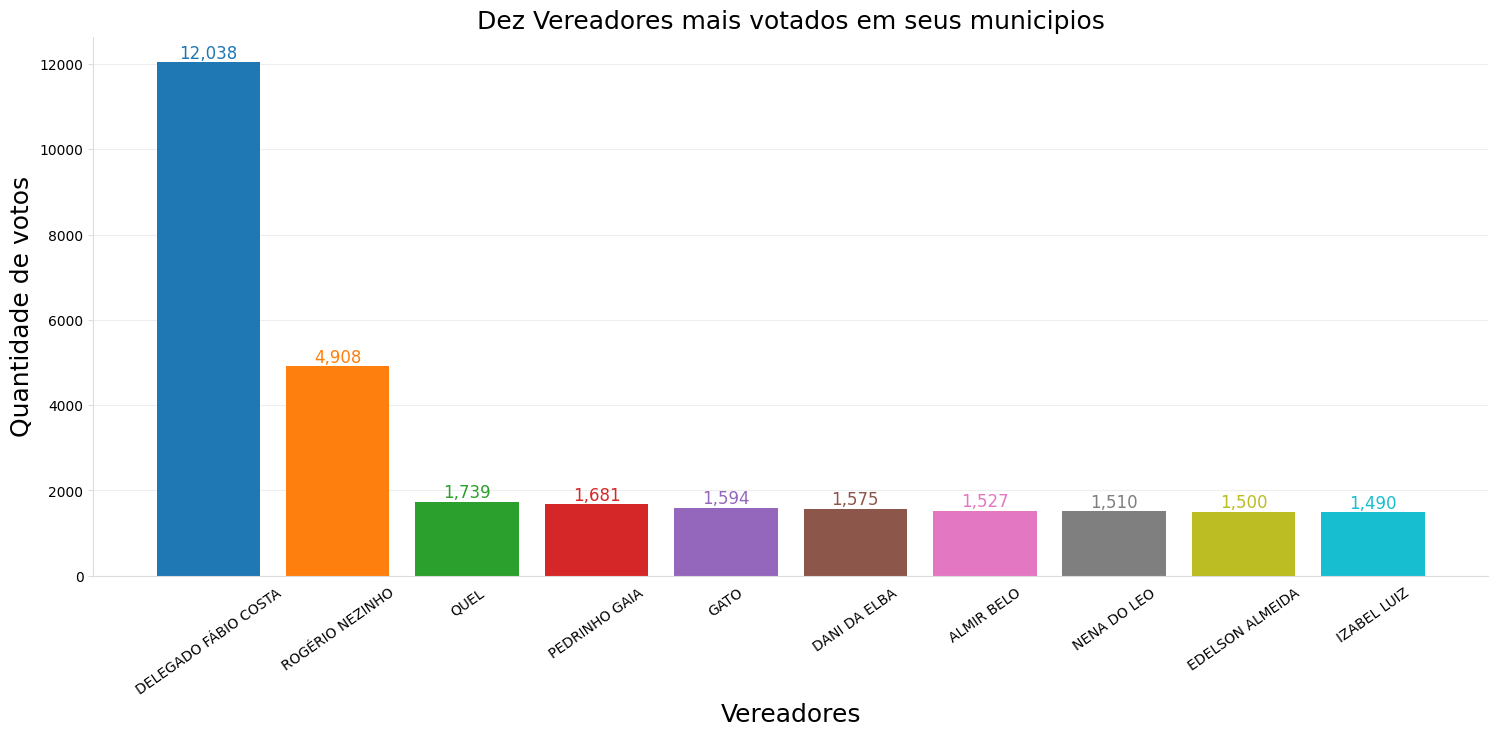

In [33]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 7))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(b.NM_URNA_CANDIDATO.head(10), b.QT_VOTOS_NOMINAIS.head(10), color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Vereadores', {'fontsize':18})
ax.set_ylabel('Quantidade de votos', {'fontsize':18})
ax.set_title('Dez Vereadores mais votados em seus municipios', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  text = f'{bar.get_height():,}'
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height():,}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

#### Agrupando os dados - Tabela 3

In [34]:
# pegando a arrecadação total dos candidatos
receitas = dados_receitas.groupby(['SQ_CANDIDATO']).agg({'NM_UE': 'first', 'DS_CARGO': 'first', 'NM_CANDIDATO': 'first','SG_PARTIDO': 'first',
                                                                                         'NR_CANDIDATO': 'first', 'ST_TURNO': 'first',
                                                                                         'VR_RECEITA':'sum', 'DS_FONTE_RECEITA': 'count'}).sort_values(by=
                                                                                                                         'VR_RECEITA',
                                                                                                                         ascending=False).reset_index()
receitas

,SQ_CANDIDATO,NM_UE,DS_CARGO,NM_CANDIDATO,SG_PARTIDO,NR_CANDIDATO,ST_TURNO,VR_RECEITA,DS_FONTE_RECEITA
0,20000842791,MACEIÓ,Prefeito,JOÃO HENRIQUE HOLANDA CALDAS,PSB,40,2,5052797.91,27
1,20000699067,MACEIÓ,Prefeito,DAVID CABRAL DAVINO FILHO,PP,11,1,2641814.86,28
2,20000774385,MACEIÓ,Prefeito,ALFREDO GASPAR DE MENDONÇA NETO,MDB,15,2,2209890.00,58
3,20000909917,ARAPIRACA,Prefeito,FABIANA CAVALCANTE PESSOA,REPUBLICANOS,10,1,1476722.70,8
4,20000686605,ARAPIRACA,Prefeito,JOSÉ LUCIANO BARBOSA DA SILVA,MDB,15,1,909142.80,410
...,...,...,...,...,...,...,...,...,...
5226,20001244301,IGREJA NOVA,Vereador,WILLIAN DA SILVA FIRMINO,REPUBLICANOS,10999,1,14.00,1
5227,20001060947,PARIPUEIRA,Vereador,SIVALDO DE LIMA SANTOS,DEM,25333,1,14.00,1
5228,20001060944,PARIPUEIRA,Vereador,ANGELA MARIA DOS SANTOS LOPES,DEM,25100,1,14.00,1
5229,20000699361,SÃO MIGUEL DOS CAMPOS,Vereador,RAQUEL VIEIRA CARLOS,MDB,15666,1,10.10,1


#### Agrupando os dados - Tabela 4

In [35]:
despesas_contratadas = dados_despesas_contratadas.groupby(['NM_UE', 'DS_CARGO', 'SQ_CANDIDATO']).agg({'NM_CANDIDATO': 'first','SG_PARTIDO': 'first',
                                                                                         'NR_CANDIDATO': 'first', 'ST_TURNO': 'first',
                                                                                         'VR_DESPESA_CONTRATADA':'sum'}).sort_values(by=
                                                                                                                         'VR_DESPESA_CONTRATADA',
                                                                                                                         ascending=False).reset_index()
despesas_contratadas

,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,NR_CANDIDATO,ST_TURNO,VR_DESPESA_CONTRATADA
0,MACEIÓ,Prefeito,20000842791,JOÃO HENRIQUE HOLANDA CALDAS,PSB,40,2,5134196.02
1,MACEIÓ,Prefeito,20000699067,DAVID CABRAL DAVINO FILHO,PP,11,1,3188196.15
2,MACEIÓ,Prefeito,20000774385,ALFREDO GASPAR DE MENDONÇA NETO,MDB,15,2,2143358.96
3,ARAPIRACA,Prefeito,20000909917,FABIANA CAVALCANTE PESSOA,REPUBLICANOS,10,1,1461511.55
4,ARAPIRACA,Prefeito,20000686605,JOSÉ LUCIANO BARBOSA DA SILVA,MDB,15,1,832287.98
...,...,...,...,...,...,...,...,...
4271,COQUEIRO SECO,Vereador,20000968176,CARLOS ALBERTO SOARES DA SILVA,MDB,15111,1,3.10
4272,COQUEIRO SECO,Vereador,20000968175,GILBERTO DOS SANTOS,MDB,15888,1,3.10
4273,COQUEIRO SECO,Vereador,20000835893,JOÃO IMBUZEIRO NETO,PSD,55123,1,3.10
4274,COQUEIRO SECO,Vereador,20000968171,ANIBAL ROSENDO DE LIMA,MDB,15555,1,3.10


### Merge entre as tabelas

In [36]:
merge0 = filtro_no_vice.merge(cand_al[['QT_VOTOS_NOMINAIS','SQ_CANDIDATO',]], how = 'inner', on='SQ_CANDIDATO')
merge0

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,QT_VOTOS_NOMINAIS
0,1,426,VIÇOSA,VEREADOR,20000673350,14555,ADEILTON ALEXANDRE FERREIRA,PAPAI FERREIRA,APTO,DEFERIDO,...,SOLTEIRO(A),PARDA,221,MOTOBOY,19368.44,NÃO ELEITO,N,DEFERIDO,SIM,5
1,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,APTO,DEFERIDO,...,CASADO(A),PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM,817
2,1,426,ARAPIRACA,VEREADOR,20001257694,43456,MARIA JOSÉ LEITE DA SILVA,MARIA JOSÉ DA MANGABEIRA,APTO,DEFERIDO,...,SOLTEIRO(A),BRANCA,411,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,94932.72,NÃO ELEITO,N,DEFERIDO,SIM,13
3,1,426,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,APTO,DEFERIDO,...,CASADO(A),PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM,3506
4,1,426,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,APTO,DEFERIDO,...,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6806,1,426,CAJUEIRO,VEREADOR,20000949146,33321,JANAINA DOS SANTOS FERREIRA,JANAINA,APTO,DEFERIDO,...,CASADO(A),PARDA,999,OUTROS,12307.75,SUPLENTE,N,DEFERIDO,SIM,25
6807,1,426,BARRA DE SÃO MIGUEL,VEREADOR,20000672457,15111,MARINALDO SILVA MARTINIANO,NALDINHO,APTO,DEFERIDO,...,SOLTEIRO(A),BRANCA,534,"MARINHEIRO CIVIL, CANOEIRO, EMBARCADO E ASSEME...",25155.92,SUPLENTE,N,DEFERIDO COM RECURSO,SIM,215
6808,1,426,TRAIPU,VEREADOR,20001031337,14044,DOUGLAS FELIPE ANDRADE MELO DOS SANTOS,DOUGLAS FELIPE,APTO,DEFERIDO,...,SOLTEIRO(A),BRANCA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",12307.75,SUPLENTE,N,DEFERIDO,SIM,11
6809,1,426,PENEDO,VEREADOR,20000929473,90444,ALDILENE DOS SANTOS,ALDILENE SANTOS,APTO,DEFERIDO,...,SOLTEIRO(A),PARDA,298,SERVIDOR PÚBLICO MUNICIPAL,30399.81,SUPLENTE,N,DEFERIDO,SIM,81


In [37]:
merge0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6811 entries, 0 to 6810
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NR_TURNO                    6811 non-null   int64  
 1   CD_ELEICAO                  6811 non-null   int64  
 2   NM_UE                       6811 non-null   object 
 3   DS_CARGO                    6811 non-null   object 
 4   SQ_CANDIDATO                6811 non-null   int64  
 5   NR_CANDIDATO                6811 non-null   int64  
 6   NM_CANDIDATO                6811 non-null   object 
 7   NM_URNA_CANDIDATO           6811 non-null   object 
 8   DS_SITUACAO_CANDIDATURA     6811 non-null   object 
 9   DS_DETALHE_SITUACAO_CAND    6811 non-null   object 
 10  SG_PARTIDO                  6811 non-null   object 
 11  DT_NASCIMENTO               6811 non-null   object 
 12  NR_IDADE_DATA_POSSE         6811 non-null   float64
 13  DS_GENERO                   6811 

In [38]:
merge1 = merge0.merge(despesas_contratadas[['VR_DESPESA_CONTRATADA','SQ_CANDIDATO']], how = 'inner', on='SQ_CANDIDATO')
merge1

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,QT_VOTOS_NOMINAIS,VR_DESPESA_CONTRATADA
0,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,APTO,DEFERIDO,...,PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM,817,10890.95
1,1,426,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,APTO,DEFERIDO,...,PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM,3506,111215.32
2,1,426,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,APTO,DEFERIDO,...,PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM,64,3952.00
3,1,426,SÃO SEBASTIÃO,VEREADOR,20000698699,77555,HENRIQUE GARCEZ DE OLIVEIRA,HENRIQUE GARCEZ,APTO,DEFERIDO,...,PARDA,257,EMPRESÁRIO,34383.77,SUPLENTE,N,DEFERIDO,SIM,240,200.00
4,1,426,BRANQUINHA,VEREADOR,20000973119,43000,ROBSON LOPES DE SOUZA,ROBINHO DO BAR,APTO,DEFERIDO,...,PARDA,278,VEREADOR,12307.75,ELEITO POR QP,N,DEFERIDO,SIM,352,1175.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4179,1,426,MARAGOGI,VEREADOR,20001028410,11789,CLAUDIANE DA SILVA SANTOS,CLAUDIANE DA SAUDE,APTO,DEFERIDO,...,PARDA,999,OUTROS,28253.68,SUPLENTE,N,DEFERIDO,SIM,43,7990.11
4180,1,426,LAGOA DA CANOA,VEREADOR,20001051116,77888,EDJANE BALBINO DOS SANTOS,JANE BALBINO,APTO,DEFERIDO,...,BRANCA,113,ENFERMEIRO,25709.97,ELEITO POR MÉDIA,N,DEFERIDO,SIM,225,2644.35
4181,1,426,DELMIRO GOUVEIA,VEREADOR,20000810612,12312,LUZINETE BARBOSA DA ROCHA,LUZINETE,APTO,DEFERIDO,...,PARDA,601,AGRICULTOR,55650.51,NÃO ELEITO,N,DEFERIDO,SIM,11,575.00
4182,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000699358,15999,ADAILTON ANTONIO DA SILVA,PEDRO DA SAÚDE,APTO,DEFERIDO,...,BRANCA,243,TÉCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...,70399.54,SUPLENTE,N,DEFERIDO,SIM,467,1945.85


## Plotando gráficos

#### Perfil Candidatos

##### Gênero dos candidatos

In [39]:
# Verificando a quatidade de candidatos de cada gênero
genero = pd.DataFrame(dados_candidatos['DS_GENERO'].value_counts())
genero = genero.drop(index='NÃO DIVULGÁVEL')
genero

,DS_GENERO
MASCULINO,5039
FEMININO,2533


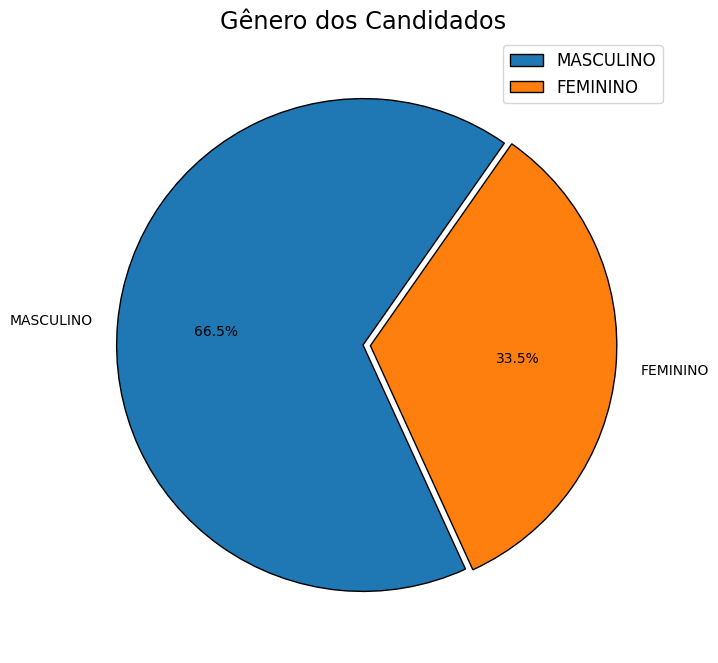

In [40]:
# Plotando un gráfico de pizza
plt.rcParams['figure.figsize']=[8,8]
explode = (0, 0.03)
plt.pie(genero['DS_GENERO'], labels=genero.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode, wedgeprops={'edgecolor': 'black'})

plt.title("Gênero dos Candidados",fontsize='xx-large')
plt.legend(fontsize=12,loc='best')
plt.show()

Curiosidade: A partir das eleições de 2020 cada partido precisou manter um número de candidatos de no minimo 30% e no maximo de 70 % para cada sexo.

##### Cor/Raça dos candidatos

In [41]:
# Verificando o nº de candidatos autodeclarados de cada cor/raça
cor_raca = pd.DataFrame(dados_candidatos['DS_COR_RACA'].value_counts())
cor_raca = cor_raca.drop(index='NÃO DIVULGÁVEL')
cor_raca

,DS_COR_RACA
PARDA,4555
BRANCA,2290
PRETA,571
NÃO INFORMADO,82
INDÍGENA,42
AMARELA,32


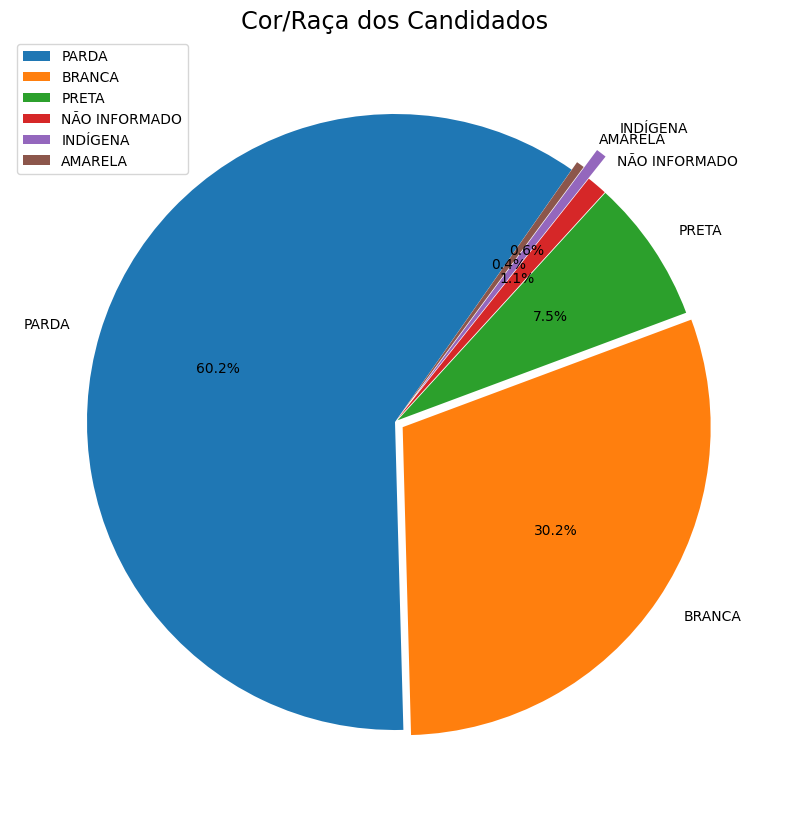

In [42]:
# Plotando o grafico de pizza
plt.rcParams['figure.figsize']=[10,10]
explode = (0, 0.03, 0.01, 0.01, 0.1, 0.03)
plt.pie(cor_raca['DS_COR_RACA'], labels=cor_raca.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode)

plt.title("Cor/Raça dos Candidados",fontsize='xx-large')
plt.legend(fontsize=10,loc='best')
plt.show()

##### Escolaridade - troca para barras

In [43]:
# Verificando o grau de instrução dos candidatos
escolaridade = pd.DataFrame(dados_candidatos['DS_GRAU_INSTRUCAO'].value_counts())
escolaridade = escolaridade.drop(index='NÃO DIVULGÁVEL') # existe apenas 1 nos dados
escolaridade

,DS_GRAU_INSTRUCAO
ENSINO MÉDIO COMPLETO,2854
SUPERIOR COMPLETO,1802
ENSINO FUNDAMENTAL INCOMPLETO,993
ENSINO FUNDAMENTAL COMPLETO,850
ENSINO MÉDIO INCOMPLETO,402
SUPERIOR INCOMPLETO,388
LÊ E ESCREVE,282
ANALFABETO,1


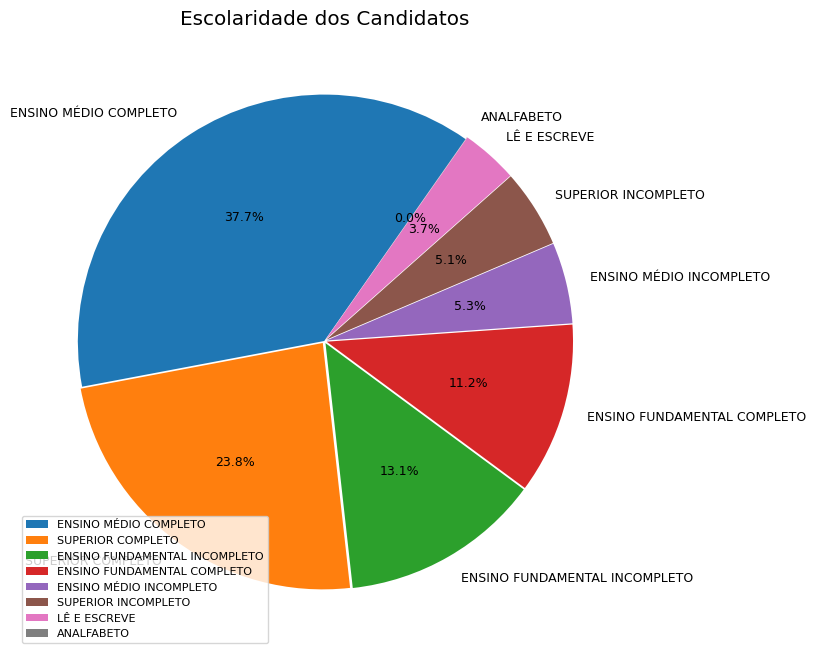

In [44]:
plt.rcParams['figure.figsize']=[8,8]
explode = (0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01)
pie = plt.pie(escolaridade['DS_GRAU_INSTRUCAO'], labels=escolaridade.index, shadow=False, autopct='%1.1f%%', startangle=55, explode=explode)

fontsize = 9
for text in pie[1] + pie[2]:
    text.set_fontsize(fontsize)

plt.title("Escolaridade dos Candidatos",fontsize='x-large')
plt.legend(fontsize=8,loc='best')
plt.show()

#### Qual partido tem o maior número de candidatos concorrendo?

In [45]:
# Verificando a quantidade de candidatos que cada partido possui
n_cand_partido = dados_candidatos[['SG_PARTIDO']].value_counts()
vinte_cand_partido = n_cand_partido.head(20)
n_cand_partido

SG_PARTIDO   
MDB              1247
PP                976
PTB               639
PSD               463
REPUBLICANOS      407
PSDB              373
PROS              332
PDT               325
DEM               315
PT                283
PSB               253
PL                253
PSC               231
PMN               213
CIDADANIA         182
PRTB              152
PSL               135
SOLIDARIEDADE     130
AVANTE            123
PODE              119
PATRIOTA          107
PC do B            73
PV                 70
PTC                61
PSOL               47
REDE               42
DC                 15
UP                  5
PSTU                1
PCB                 1
dtype: int64

In [46]:
# pegando os 10 partidos com maiores números
n_cand_partido = n_cand_partido.head(10).reset_index() # resetando os indices para volta a ser um dataframe
n_cand_partido

,SG_PARTIDO,0
0,MDB,1247
1,PP,976
2,PTB,639
3,PSD,463
4,REPUBLICANOS,407
5,PSDB,373
6,PROS,332
7,PDT,325
8,DEM,315
9,PT,283


In [47]:
# pegando a coluna do count
n_cand_partido.iloc[:, 1] # n_cand_partido['0'] não funciona

0    1247
1     976
2     639
3     463
4     407
5     373
6     332
7     325
8     315
9     283
Name: 0, dtype: int64

Graficos de Barras adptados de : [link](https://)

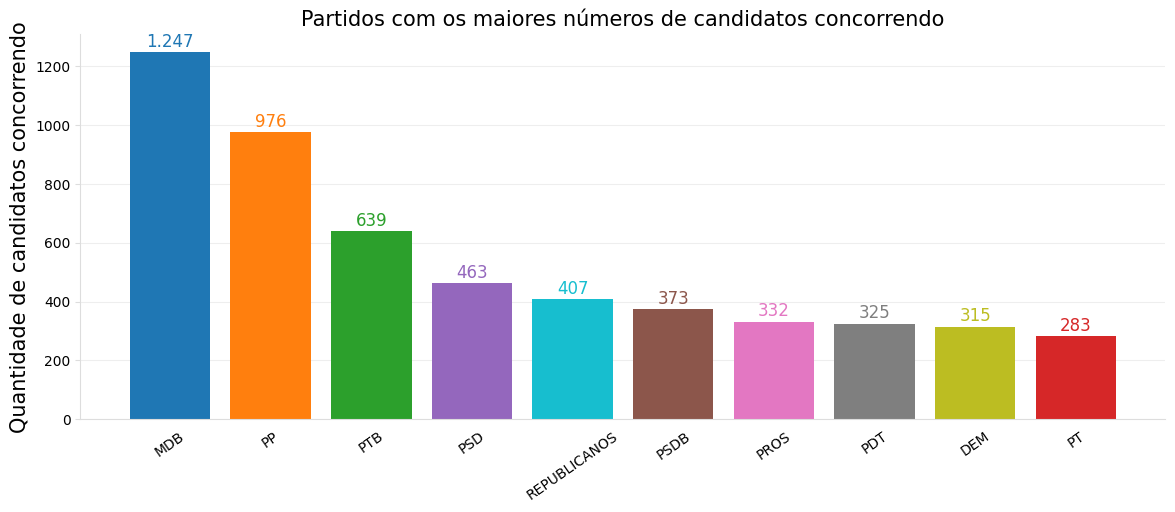

In [48]:
# Plotando um gráfico de barras
fig, ax = plt.subplots(figsize=(14, 5))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#17becf',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#d62728' ] # tentar pegar as cores reais dos partidos dps

ax.bar(n_cand_partido.SG_PARTIDO, n_cand_partido.iloc[:, 1], color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_ylabel('Quantidade de candidatos concorrendo', {'fontsize':15})
ax.set_title('Partidos com os maiores números de candidatos concorrendo', {'fontsize':15})

for bar in ax.patches:
  # A informação em cima da barra deve ser sua altura.
  bar_value = bar.get_height()
  # Determina onde o texto sob as barra fica
  text = f'{bar_value:,}' # formata adicionando o separador de milhar
  text = text.replace(',', '.') # trocando pro padrão brasileiro
  # pega o meio da barra no eixo x.
  text_x = bar.get_x() + bar.get_width() / 2 # Somando a coordenada x do inicio da barra com a metade de sua largura
  # Pegando a localização da barra no eixo y
  text_y = bar_value + 5
  # Pegando a cor da barra:
  bar_color = bar.get_facecolor()
 
 # Add o texto das barras
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, rotation=0, size=12)
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

In [ ]:
#Quantidade de candidato concorrendo e eleito - dispersão

#### Qual partido elegeu mais cadidatos no 1º turno?

In [49]:
# Filtrando o dataframe pelos candidatos eleitos
cand_eleitos = dados_candidatos[(dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO') | (dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO POR QP') 
                | (dados_candidatos.DS_SIT_TOT_TURNO == 'ELEITO POR MÉDIA')] # não é nescessario diferenciar qual o tipo de criterio de eleição
count_cand_eleitos = cand_eleitos[['SG_PARTIDO']].value_counts()
count_cand_eleitos

SG_PARTIDO   
MDB              366
PP               264
PTB              133
PSD               82
DEM               60
PL                50
PSC               49
REPUBLICANOS      47
PSDB              46
PSB               38
PROS              28
PDT               27
CIDADANIA         15
PT                14
PMN               14
PODE              13
SOLIDARIEDADE     13
PSL                8
PRTB               6
PV                 5
AVANTE             5
PC do B            2
PTC                1
dtype: int64

In [50]:
count_cand_eleitos.sum() # quantidade de candidatos eleitos no 1 turno

1286

In [51]:
count_cand_eleitos = count_cand_eleitos.head(10).reset_index() # pegando os 10 partidos que mais elegeram cadidatos
count_cand_eleitos

,SG_PARTIDO,0
0,MDB,366
1,PP,264
2,PTB,133
3,PSD,82
4,DEM,60
5,PL,50
6,PSC,49
7,REPUBLICANOS,47
8,PSDB,46
9,PSB,38


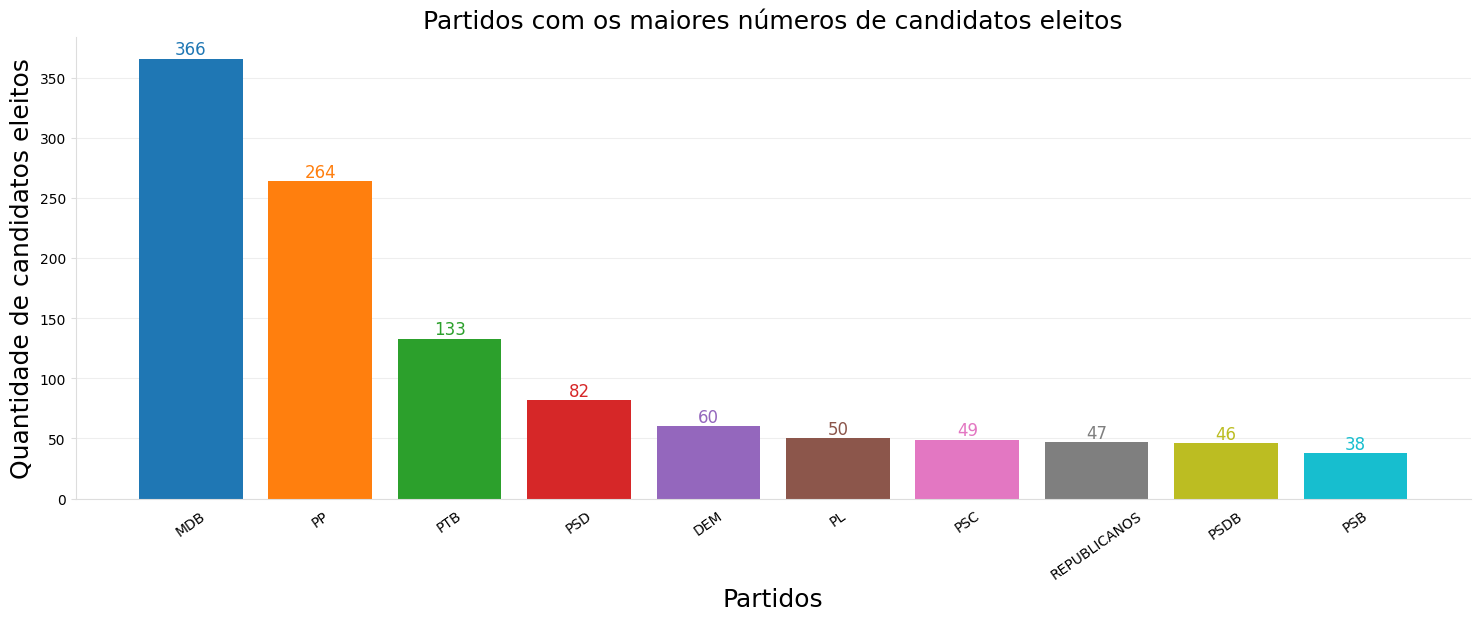

In [52]:
# Plotando gráfico de barras
fig, ax = plt.subplots(figsize=(18, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

ax.bar(count_cand_eleitos.SG_PARTIDO, count_cand_eleitos.iloc[:, 1], color=colors)

ax.spines['top'].set_visible(False) # linha superior do grafico
ax.spines['right'].set_visible(False) # linha da direita
ax.spines['left'].set_color('#DDDDDD') # linha da esquerda
ax.spines['bottom'].set_color('#DDDDDD') # linha de baixo
ax.tick_params(bottom=False, color='#DDDDDD',left=True) # traço 
ax.set_axisbelow(True) # esconde as linhas horizontais durante as barras
ax.yaxis.grid(color='#EEEEEE') # esconde ou mostra as linhas 
ax.xaxis.grid(False) # esconde ou mostra as linhas verticais

ax.set_xlabel('Partidos', {'fontsize':18})
ax.set_ylabel('Quantidade de candidatos eleitos', {'fontsize':18})
ax.set_title('Partidos com os maiores números de candidatos eleitos', {'fontsize':18})

# Add o texto nas barras
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() , f'{bar.get_height()}', ha='center', va='bottom', color=bar.get_facecolor(),
          rotation=0, size=12) 
  
plt.xticks(rotation = 35) # rotação no 
plt.show()

#### Quais partidos conseguiram eleger mais candidatos proporcionalmente?

#### Visualizando o limite de gastos declarados pelos partidos em AL para os candidatos

###### Dez maiores valores máximos declarados como despesa de campanha pelos partidos para um candidato no estado de AL

In [53]:
# Descobrindo os 10 maiores valores unicos
maiores_limites_cand = dados_candidatos.VR_DESPESA_MAX_CAMPANHA.unique()
maiores_limites_cand = np.sort(maiores_limites_cand)[::-1] # Ordenando de forma decrescente
print(maiores_limites_cand[0:10]) # mostrando os 10 maiores valores
print(maiores_limites_cand[9]) # o menor maior valor entre os 10

[5131759.9  2633359.67 2237191.48  931654.74  907681.86  562972.49
  555502.66  534652.28  532811.97  511605.02]
511605.02


In [54]:
# como observamos que o menor entre os 10 maiores é 511605.02
cand_maiores_limites = dados_candidatos.loc[dados_candidatos['VR_DESPESA_MAX_CAMPANHA'] >= 511605.02]
cand_maiores_limites.nunique() # Verificando se as despesas estao iguais a 10 e comos os outro atributos ficaram

NR_TURNO                       1
CD_ELEICAO                     1
NM_UE                         10
DS_CARGO                       1
SQ_CANDIDATO                  48
NR_CANDIDATO                  21
NM_CANDIDATO                  48
NM_URNA_CANDIDATO             48
DS_SITUACAO_CANDIDATURA        2
DS_DETALHE_SITUACAO_CAND       3
SG_PARTIDO                    21
DT_NASCIMENTO                 48
NR_IDADE_DATA_POSSE           29
DS_GENERO                      2
DS_GRAU_INSTRUCAO              6
DS_ESTADO_CIVIL                4
DS_COR_RACA                    3
CD_OCUPACAO                   19
DS_OCUPACAO                   19
VR_DESPESA_MAX_CAMPANHA       10
DS_SIT_TOT_TURNO               4
ST_REELEICAO                   2
DS_SITUACAO_CANDIDATO_URNA     5
ST_CANDIDATO_INSERIDO_URNA     2
dtype: int64

In [55]:
# Cria um Dataframe agrupando por despesas e gênero e contando suas ocorrencias
maiores_limites = pd.DataFrame(cand_maiores_limites[['VR_DESPESA_MAX_CAMPANHA','DS_GENERO']]).value_counts().reset_index() 
maiores_limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
0,5131759.90,MASCULINO,8
1,2237191.48,MASCULINO,6
2,511605.02,MASCULINO,4
3,534652.28,MASCULINO,4
4,555502.66,MASCULINO,4
5,2633359.67,MASCULINO,4
6,562972.49,MASCULINO,3
7,931654.74,MASCULINO,3
8,532811.97,FEMININO,2
9,555502.66,FEMININO,2


In [56]:
# É necessario que para todas despesas haja um valor correspondente ao sexo masculino e feminino
# então os sexos são dividos em tabela diferentes para que se possa adicionar os valores faltantes
limites_masc = maiores_limites[maiores_limites.DS_GENERO== 'MASCULINO']
limites_masc = limites_masc.sort_values(by='VR_DESPESA_MAX_CAMPANHA', ascending=False)
limites_masc

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
0,5131759.90,MASCULINO,8
5,2633359.67,MASCULINO,4
1,2237191.48,MASCULINO,6
7,931654.74,MASCULINO,3
10,907681.86,MASCULINO,2
6,562972.49,MASCULINO,3
4,555502.66,MASCULINO,4
3,534652.28,MASCULINO,4
14,532811.97,MASCULINO,1
2,511605.02,MASCULINO,4


In [57]:
# tabela com os limites femininos
limites_femi = maiores_limites[maiores_limites.DS_GENERO== 'FEMININO']
limites_femi = limites_femi.sort_values(by='VR_DESPESA_MAX_CAMPANHA', ascending=False)
limites_femi

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO,0
12,5131759.90,FEMININO,2
11,2237191.48,FEMININO,2
9,555502.66,FEMININO,2
8,532811.97,FEMININO,2
13,511605.02,FEMININO,1


In [58]:
# Merge das tabelas
limites = limites_masc.merge(limites_femi, how = 'outer', on='VR_DESPESA_MAX_CAMPANHA')
limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO_x,0_x,DS_GENERO_y,0_y
0,5131759.90,MASCULINO,8,FEMININO,2.0
1,2633359.67,MASCULINO,4,NaN,NaN
2,2237191.48,MASCULINO,6,FEMININO,2.0
3,931654.74,MASCULINO,3,NaN,NaN
4,907681.86,MASCULINO,2,NaN,NaN
5,562972.49,MASCULINO,3,NaN,NaN
6,555502.66,MASCULINO,4,FEMININO,2.0
7,534652.28,MASCULINO,4,NaN,NaN
8,532811.97,MASCULINO,1,FEMININO,2.0
9,511605.02,MASCULINO,4,FEMININO,1.0


In [59]:
# 
limites['DS_GENERO_y'] =  'FEMININO' # Atribui a todas as linhas da coluna o valor feminino
limites.fillna(value=0, inplace=True) # Substitui valor nulos por 0
limites

,VR_DESPESA_MAX_CAMPANHA,DS_GENERO_x,0_x,DS_GENERO_y,0_y
0,5131759.90,MASCULINO,8,FEMININO,2.0
1,2633359.67,MASCULINO,4,FEMININO,0.0
2,2237191.48,MASCULINO,6,FEMININO,2.0
3,931654.74,MASCULINO,3,FEMININO,0.0
4,907681.86,MASCULINO,2,FEMININO,0.0
5,562972.49,MASCULINO,3,FEMININO,0.0
6,555502.66,MASCULINO,4,FEMININO,2.0
7,534652.28,MASCULINO,4,FEMININO,0.0
8,532811.97,MASCULINO,1,FEMININO,2.0
9,511605.02,MASCULINO,4,FEMININO,1.0


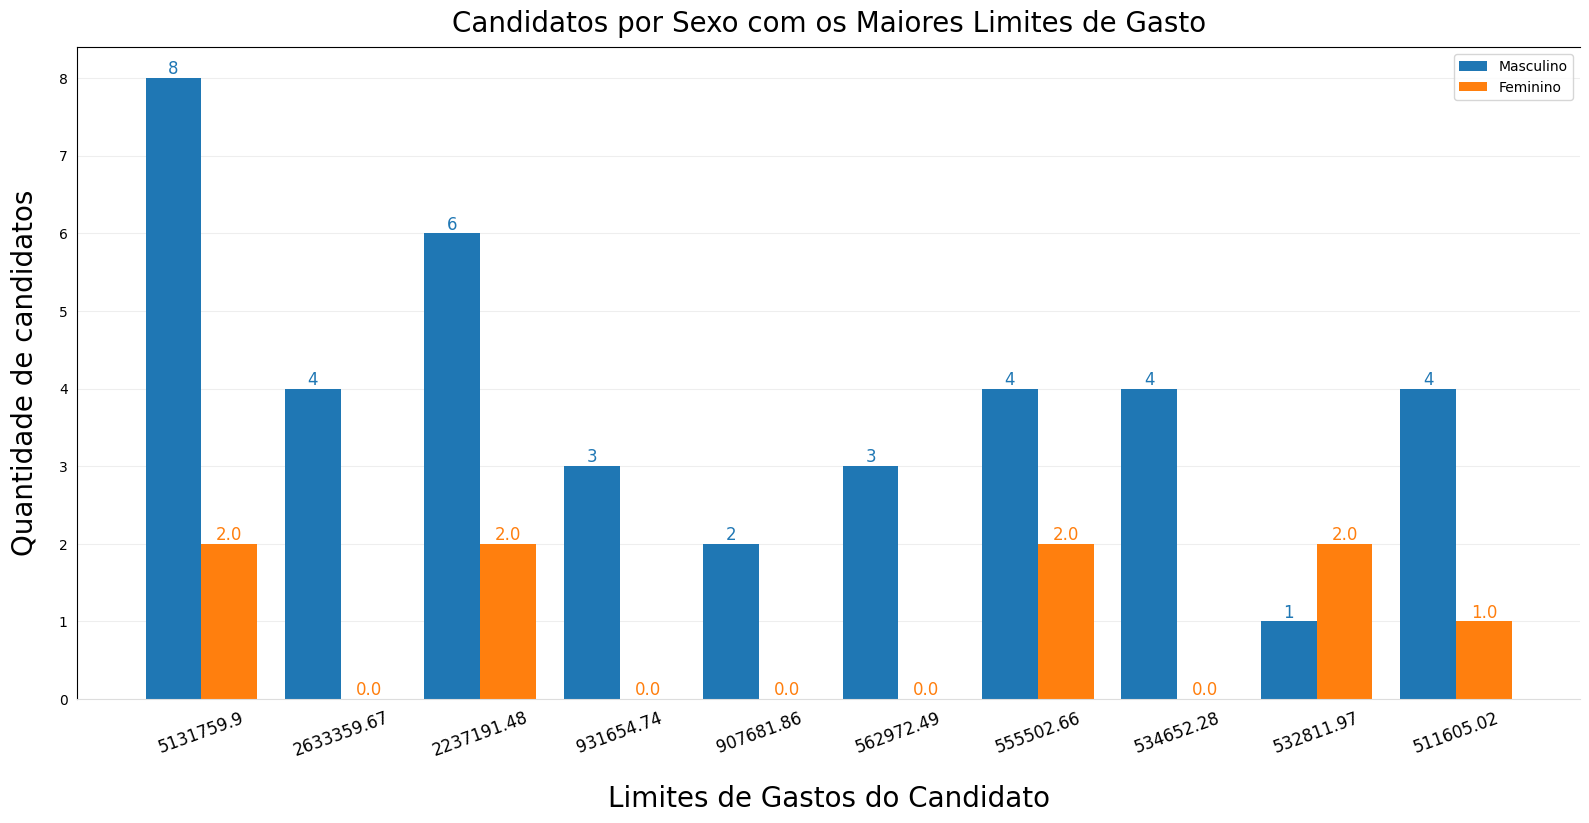

In [60]:
# 
fig, ax = plt.subplots(figsize=(16, 8))
x = np.arange(len(limites.VR_DESPESA_MAX_CAMPANHA.unique()))
bar_width = 0.4

b1 = ax.bar(x, limites.loc[limites.DS_GENERO_x== 'MASCULINO', limites.columns[2]],
            width=bar_width, label='Masculino')
b2 = ax.bar(x + bar_width, limites.loc[limites.DS_GENERO_y== 'FEMININO', limites.columns[4]],
            width=bar_width, label='Feminino')

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(limites.VR_DESPESA_MAX_CAMPANHA.unique(), fontsize=12)

ax.legend()

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Limites de Gastos do Candidato', {'fontsize':20}, labelpad=18) # desloca para cima
ax.set_ylabel('Quantidade de candidatos', {'fontsize':20}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo com os Maiores Limites de Gasto', {'fontsize':20}, pad=11) # desloca para baixo

fig.tight_layout()

# Adiciona teXto em cada barra
for bar in ax.patches:
  # A informação em cima da barra deve ser sua altura.
  bar_value = bar.get_height()
  # Determina onde o texto sob as barra fica
  text = f'{bar_value:,}'
  # pega o meio da barra no eixo x.
  text_x = bar.get_x() + bar.get_width() / 2
  # Pegando altura no eixo y
  text_y = bar_value
  # Pegando a cor da barra:
  bar_color = bar.get_facecolor()
 
 # Add o texto das barras
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, rotation=0, size=12) 
  
plt.xticks(rotation = 20) # 
plt.show()

#### Limites de gastos impostos para os candidatos por genero/partido - Grouped bar chart with labels

In [61]:
# Pegando os vinte partidos com maiores números de candidatos
vinte = vinte_cand_partido.reset_index()
vinte

,SG_PARTIDO,0
0,MDB,1247
1,PP,976
2,PTB,639
3,PSD,463
4,REPUBLICANOS,407
5,PSDB,373
6,PROS,332
7,PDT,325
8,DEM,315
9,PT,283


In [62]:
# transformando em lista pra o método isin pegar os candidatos que estão nesses partidos
vintep = vinte.SG_PARTIDO.to_list()
vintep

['MDB',
 'PP',
 'PTB',
 'PSD',
 'REPUBLICANOS',
 'PSDB',
 'PROS',
 'PDT',
 'DEM',
 'PT',
 'PSB',
 'PL',
 'PSC',
 'PMN',
 'CIDADANIA',
 'PRTB',
 'PSL',
 'SOLIDARIEDADE',
 'AVANTE',
 'PODE']

In [63]:
# Pegando os candidatos que estão na lista dos 20 partidos mais populosos para que se possa distinguir entre masculino e feminino
vinte_cand = dados_candidatos[dados_candidatos.SG_PARTIDO.isin(vintep)] # Caso o partido da tabela seja um dos que estão na lista
vinte_cand

,NR_TURNO,CD_ELEICAO,NM_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,DS_DETALHE_SITUACAO_CAND,...,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO,ST_REELEICAO,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,1,426,VIÇOSA,VEREADOR,20000673350,14555,ADEILTON ALEXANDRE FERREIRA,PAPAI FERREIRA,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,221,MOTOBOY,19368.44,NÃO ELEITO,N,DEFERIDO,SIM
1,1,426,SÃO MIGUEL DOS CAMPOS,VEREADOR,20000922834,25630,PETRÔNIO VERÇOSA LEMOS,PETRÔNIO VERÇOSA,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,70399.54,ELEITO POR QP,N,DEFERIDO,SIM
3,1,426,PIAÇABUÇU,PREFEITO,20000797456,12,KAYRO CRISTÓVÃO CASTRO DOS SANTOS,KAYRO CASTRO,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,601,AGRICULTOR,123077.42,NÃO ELEITO,N,DEFERIDO,SIM
4,1,426,SÃO SEBASTIÃO,VEREADOR,20000698660,11456,FHYSLAUREN FIRMINO ALBUQUERQUE,FHYSLAUREN ALBUQUERQUE,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",34383.77,SUPLENTE,N,DEFERIDO,SIM
5,1,426,SÃO SEBASTIÃO,VEREADOR,20000698699,77555,HENRIQUE GARCEZ DE OLIVEIRA,HENRIQUE GARCEZ,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,257,EMPRESÁRIO,34383.77,SUPLENTE,N,DEFERIDO,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7577,1,426,MACEIÓ,VEREADOR,20001187317,25020,JOÃO CLÁUDIO RIOS,CLÁUDIO RIOS,INAPTO,INDEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,163,CANTOR E COMPOSITOR,251112.20,NÃO ELEITO,N,INDEFERIDO COM RECURSO,SIM
7578,1,426,CAJUEIRO,VEREADOR,20000949146,33321,JANAINA DOS SANTOS FERREIRA,JANAINA,APTO,DEFERIDO,...,ENSINO MÉDIO INCOMPLETO,CASADO(A),PARDA,999,OUTROS,12307.75,SUPLENTE,N,DEFERIDO,SIM
7579,1,426,BARRA DE SÃO MIGUEL,VEREADOR,20000672457,15111,MARINALDO SILVA MARTINIANO,NALDINHO,APTO,DEFERIDO,...,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,534,"MARINHEIRO CIVIL, CANOEIRO, EMBARCADO E ASSEME...",25155.92,SUPLENTE,N,DEFERIDO COM RECURSO,SIM
7580,1,426,TRAIPU,VEREADOR,20001031337,14044,DOUGLAS FELIPE ANDRADE MELO DOS SANTOS,DOUGLAS FELIPE,APTO,DEFERIDO,...,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",12307.75,SUPLENTE,N,DEFERIDO,SIM


In [64]:
# Cria um Dataframe agrupando por despesas e gênero e contando suas ocorrencias
maiores_gastos20 = pd.DataFrame(vinte_cand[['DS_GENERO','SG_PARTIDO']]).value_counts() #.reset_index()
maiores_gastos20 = maiores_gastos20.drop(index='NÃO DIVULGÁVEL').reset_index()
maiores_gastos20

<ipython-input-64-638804bd481e>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  maiores_gastos20 = maiores_gastos20.drop(index='NÃO DIVULGÁVEL').reset_index()


,DS_GENERO,SG_PARTIDO,0
0,MASCULINO,MDB,835
1,MASCULINO,PP,645
2,MASCULINO,PTB,431
3,FEMININO,MDB,412
4,FEMININO,PP,330
5,MASCULINO,PSD,309
6,MASCULINO,REPUBLICANOS,269
7,MASCULINO,PSDB,252
8,MASCULINO,PROS,223
9,MASCULINO,PDT,213


In [65]:
maiores_gastos20.DS_GENERO.value_counts() # verificando se há o mesmo número de Homens e mulheres para plotar o group bar

MASCULINO    20
FEMININO     20
Name: DS_GENERO, dtype: int64

In [66]:
# Calculando as porcentagens de cada sexo no partido
porcentagem = []
 
for i in range(maiores_gastos20.shape[0]): # Iterar sob o a tabela
  for j in vinte.SG_PARTIDO: # iterar sob a lista com os partidos e sua quatidade total de membros
    #print(j, i, maiores_gastos20['SG_PARTIDO'][i])
    if j == maiores_gastos20['SG_PARTIDO'][i]: # Quando encontrado a correspondencia entre os partidos em ambas tabela
      #print('2',maiores_gastos20.iloc[:, 2][i], vinte.iloc[:, 1][a])
      a = vinte.index[vinte['SG_PARTIDO']== j].tolist() # Pega o indice que vai estar em Int64Index e converte para lista para que se possa pegar o limite do partido
      a = a[0] # Pega o 1 item da lista que é o indice do partido que precisamos
      pct = (maiores_gastos20.iloc[:, 2][i] / vinte.iloc[:, 1][a]) * 100  # calcula-se a porcentagem pegando o limite (limiteporSexo/limitePartido) * 100
      porcentagem.append(round(pct, 2)) 
 
print(porcentagem)

[66.96, 66.09, 67.45, 33.04, 33.81, 66.74, 66.09, 67.56, 67.17, 65.54, 66.35, 32.55, 65.37, 68.38, 66.4, 33.26, 66.23, 67.61, 33.91, 32.44, 64.84, 34.46, 32.83, 33.65, 67.11, 34.63, 65.93, 66.92, 33.6, 67.48, 31.62, 33.77, 64.71, 32.39, 35.16, 32.89, 34.07, 33.08, 35.29, 32.52]


In [67]:
maiores_gastos20['Porcentagem'] = porcentagem # add as porcentagens a tabela
maiores_gastos20

,DS_GENERO,SG_PARTIDO,0,Porcentagem
0,MASCULINO,MDB,835,66.96
1,MASCULINO,PP,645,66.09
2,MASCULINO,PTB,431,67.45
3,FEMININO,MDB,412,33.04
4,FEMININO,PP,330,33.81
5,MASCULINO,PSD,309,66.74
6,MASCULINO,REPUBLICANOS,269,66.09
7,MASCULINO,PSDB,252,67.56
8,MASCULINO,PROS,223,67.17
9,MASCULINO,PDT,213,65.54


In [68]:
# É nescessario ordenar pois espara-se um cadidato masc e femi para cada partido na mesma sequencia
maiores_gastos20 = maiores_gastos20.sort_values(by='SG_PARTIDO')
maiores_gastos20

,DS_GENERO,SG_PARTIDO,0,Porcentagem
39,FEMININO,AVANTE,40,32.52
29,MASCULINO,AVANTE,83,67.48
34,FEMININO,CIDADANIA,64,35.16
20,MASCULINO,CIDADANIA,118,64.84
23,FEMININO,DEM,106,33.65
10,MASCULINO,DEM,209,66.35
0,MASCULINO,MDB,835,66.96
3,FEMININO,MDB,412,33.04
21,FEMININO,PDT,112,34.46
9,MASCULINO,PDT,213,65.54


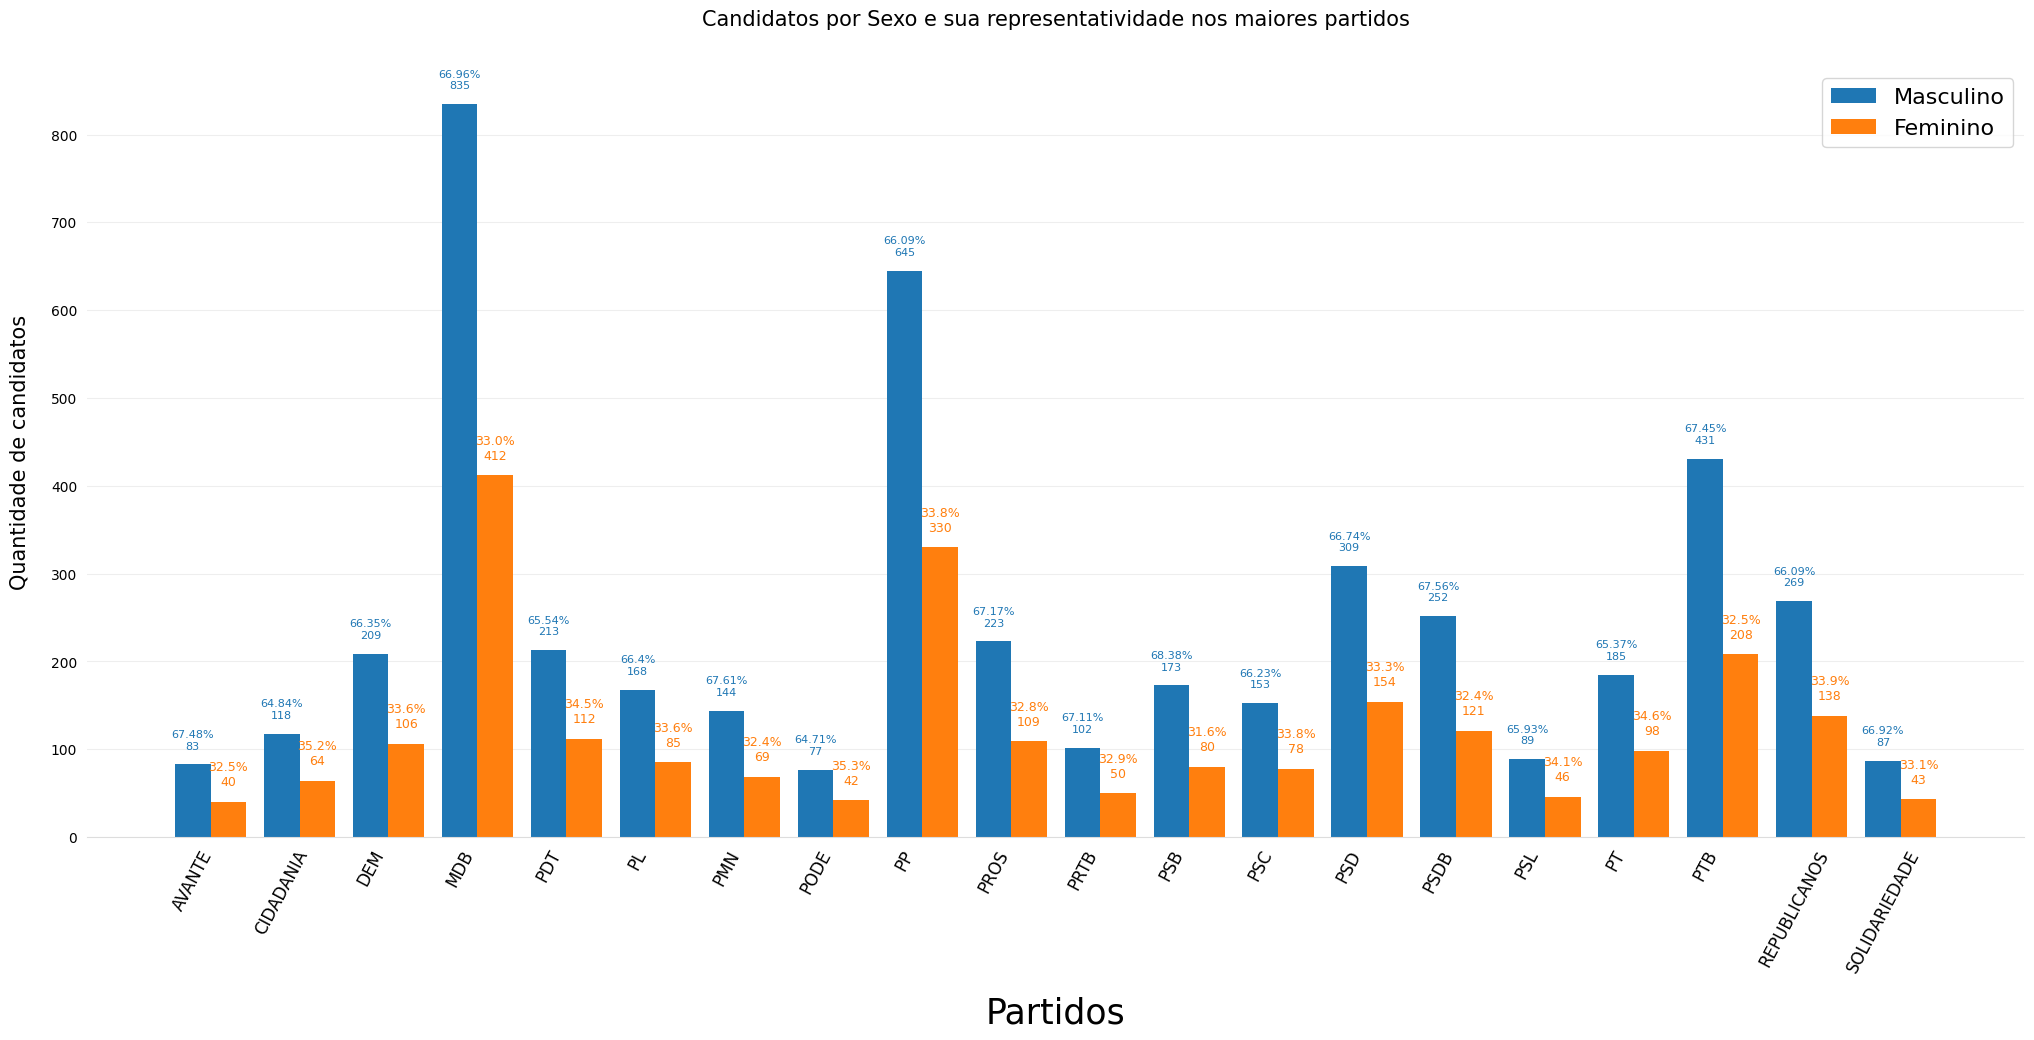

In [69]:
#
fig, ax = plt.subplots(figsize=(25, 10))
x = np.arange(len(maiores_gastos20.SG_PARTIDO.unique()))
bar_width = 0.4
b1 = ax.bar(x, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'MASCULINO', maiores_gastos20.columns[2]],
            width=bar_width, label='Masculino')
b2 = ax.bar(x + bar_width, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'FEMININO', maiores_gastos20.columns[2]],
            width=bar_width, label='Feminino')

ax.set_xticks(x)
ax.set_xticklabels(maiores_gastos20.SG_PARTIDO.unique(), fontsize=12)

ax.legend(fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Partidos', {'fontsize':25}, labelpad=15) # desloca para cima
ax.set_ylabel('Quantidade de candidatos', {'fontsize':15}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo e sua representatividade nos maiores partidos', {'fontsize':15}, pad=30) # desloca para baixo

# Colando a porcentagem no topo da barra
for rect,p in zip(b1, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'MASCULINO']['Porcentagem']): # pega a barra e sua porcentagem de acordo com o sexo
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+15, f'{p}%\n{height}', ha='center', va='bottom', fontsize=8, rotation=0, color=rect.get_facecolor())

for rect,p in zip(b2, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'FEMININO']['Porcentagem']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+15, f'{p:.1f}%\n{height}', ha='center', va='bottom', fontsize=9, rotation=0, color=rect.get_facecolor())

plt.xticks(rotation = 62)
plt.show()

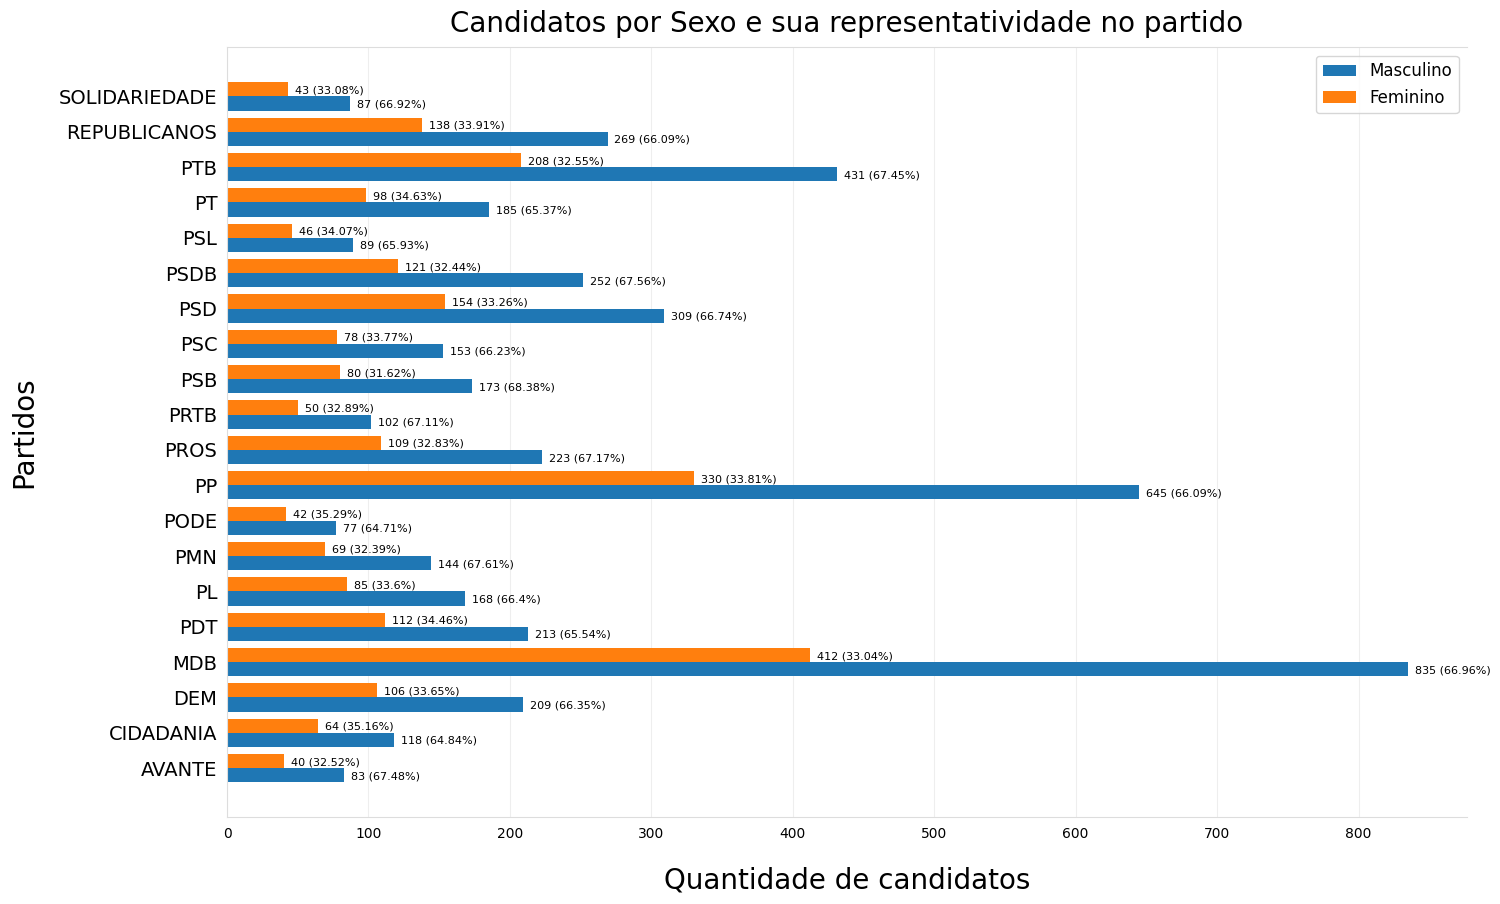

In [70]:

fig, ax = plt.subplots(figsize=(16, 10))
x = np.arange(len(maiores_gastos20.SG_PARTIDO.unique()))
bar_height = 0.4
b1 = ax.barh(x, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'MASCULINO', maiores_gastos20.columns[2]],
            height=bar_height, label='Masculino')
b2 = ax.barh(x + bar_width, maiores_gastos20.loc[maiores_gastos20.DS_GENERO== 'FEMININO', maiores_gastos20.columns[2]],
            height=bar_height, label='Feminino')

ax.set_yticks(x + bar_height/2)
ax.set_yticklabels(maiores_gastos20.SG_PARTIDO.unique(),fontsize=14)
ax.legend(fontsize=12)

ax.spines['top'].set_color('#DDDDDD')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#DDDDDD')
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True) # escondendo as linhas horizontais
ax.yaxis.grid(False)
ax.xaxis.grid(True, color='#EEEEEE')

ax.set_xlabel('Quantidade de candidatos', {'fontsize':20}, labelpad=18) # desloca para cima
ax.set_ylabel('Partidos', {'fontsize':20}, labelpad=15) # desloca pra direita
ax.set_title('Candidatos por Sexo e sua representatividade no partido', {'fontsize':20}, pad=11) # desloca para baixo

#fig.tight_layout() 

# Colando a porcentagem no topo da barra
for rect,p in zip(b1, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'MASCULINO']['Porcentagem']): # pega a barra e sua porcentagem de acordo com o sexo
    width = rect.get_width()
    ax.annotate(f'{width} ({p}%)', xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(5, 0), textcoords="offset points",ha='left',
                va='center_baseline', fontsize=8)

for rect,p in zip(b2, maiores_gastos20.loc[maiores_gastos20['DS_GENERO'] == 'FEMININO']['Porcentagem']):
    width = rect.get_width()
    ax.annotate(f'{width} ({p}%)', xy=(width, rect.get_y() + rect.get_height() / 2), xytext=(5, 0), textcoords="offset points",ha='left',
                va='center_baseline', fontsize=8)

#### Visualizando a arrecadação declarada pelos candidatos

##### Investimento do partido em candidatos por genero/partido - Grouped bar chart with labels?

#### Três candidatos mais votados para o cargo de prefeito nas 5 cidades mais populosas

#### Três candidatos mais votados para o cargo de vereador nas 5 cidades mais populosas

#### Grafico de Dispersão voto x Limite de gastos na campanha

In [71]:
# Pegando dados da junção entre a tabela 1 e 2
amostra1 = merge0.VR_DESPESA_MAX_CAMPANHA
amostra2 = merge0.QT_VOTOS_NOMINAIS

In [72]:
np.corrcoef(amostra1,amostra2)[0,1]

0.6060168410760818

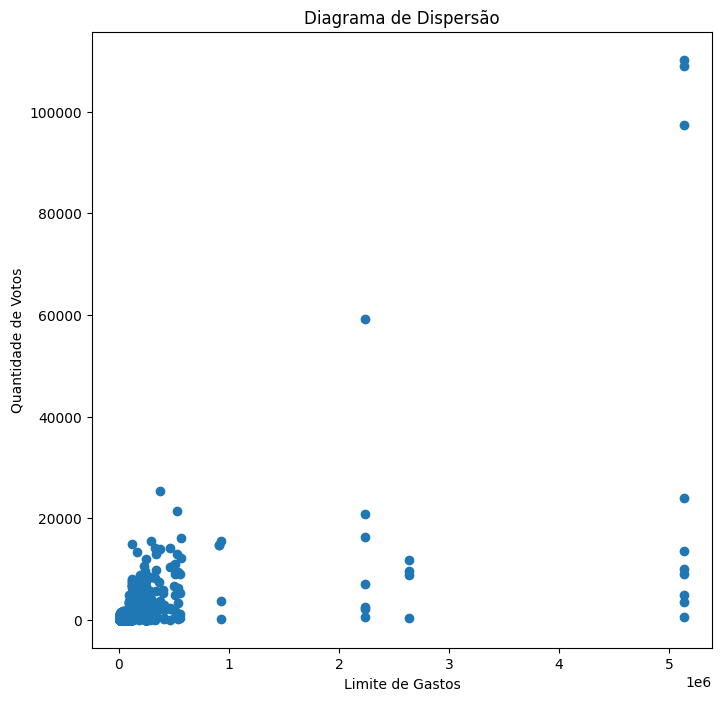

In [73]:
plt.scatter(amostra1, amostra2)
plt.xlabel('Limite de Gastos')
plt.ylabel('Quantidade de Votos')
plt.title('Diagrama de Dispersão')
plt.show()

#### Grafico de Dispersão voto x Gastos na campanha

In [74]:
# Pega o resultado entre o merge das tabela com os votos porcadi
amostra1 = merge1.VR_DESPESA_CONTRATADA
amostra2 = merge1.QT_VOTOS_NOMINAIS

In [75]:
np.corrcoef(amostra1,amostra2)[0,1] #  indica correlação positiva forte

0.8966803429401575

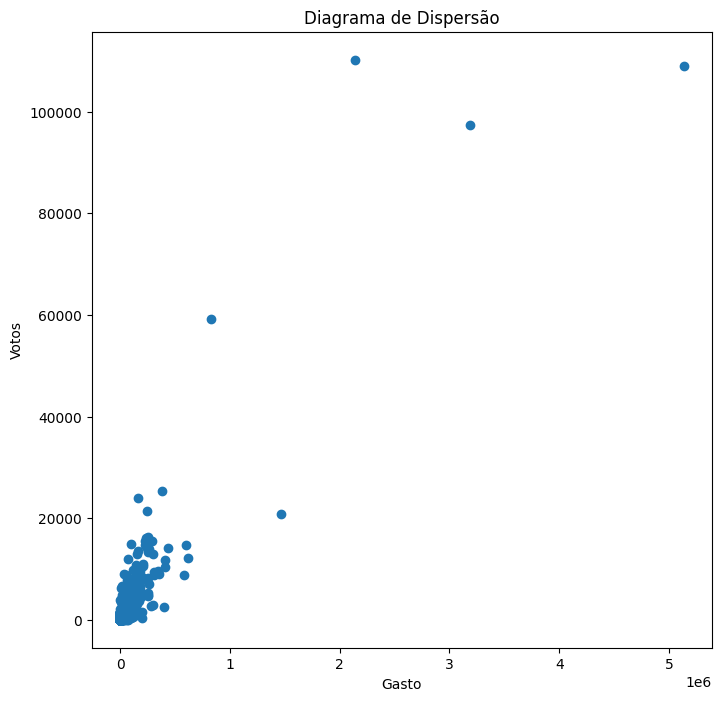

In [76]:
plt.scatter(amostra1, amostra2)
plt.xlabel('Gasto')
plt.ylabel('Votos')
plt.title('Diagrama de Dispersão')
plt.show()

In [77]:
import plotly.express as px

px.scatter(x=amostra1, y=amostra2, hover_name=merge1.NM_URNA_CANDIDATO, color=merge1.SG_PARTIDO)

#### Grafico de barras - gastos por partido

# Identificando o perfil do Eleitor

## Tabela 4 - Dados do Eleitor

**Pricipais atributos do dataset**: 

*   NR_TURNO - Búmero do turno
*   SG_UF	- Unidade da Federação
*   NM_MUNICIPIO - Nome do município
*   NR_ZONA - Número da Zona Eleitoral
*   CD_GENERO - Código do gênero do eleitor
*   DS_GENERO - Gênero do eleitor
*   CD_ESTADO_CIVIL - Código do estado civil do eleitor 
*   DS_ESTADO_CIVIL - Estado civil do eleitor de acordo com a última atualização realizada pelo mesmo na Justiça Eleitora
*   CD_FAIXA_ETARIA - Código da faixa etária
* DS_FAIXA_ETARIA - Faixa etária
* CD_GRAU_ESCOLARIDADE - Código do grau de escolaridade do eleitor de acordo com a última atualização realizada pelo mesmo na Justiça Eleitoral.
* DS_GRAU_ESCOLARIDADE - Grau de escolaridade do eleitor
* QT_APTOS - Quantidade de eleitores aptos a votar naquele município e 
zona no ano eleitoral
* QT_COMPARECIMENTO - Quantidade de eleitores aptos que compareceram às 
eleições naquele município e zona no ano eleitoral.
* QT_ABSTENCAO - Quantidade de eleitores aptos que não compareceram às 
eleições naquele município e zona no ano eleitoral
* QT_COMPARECIMENTO_DEFICIENCIA - Quantitativo de eleitores aptos com deficiência oumobilidade reduzida que compareceram às eleições 
naquele município e zona no ano eleitoral
* QT_ABSTENCAO_DEFICIENCIA - Quantitativo de eleitores aptos com deficiência ou 
mobilidade reduzida que não compareceram às eleições naquele município e zona no ano eleitoral.
* QT_COMPARECIMENTO_TTE - Quantitativo de eleitores aptos que solicitaram 
transferência temporária de eleitor (TTE) e que compareceram às eleições naquele município e zona no ano eleitoral.
* QT_ABSTENCAO_TTE - Quantitativo de eleitores aptos que solicitaram transferência temporária de eleitor (TTE) e que não compareceram às eleições naquele município e zona no ano eleitoral


**Quantidade de linhas** = 4770970

**Quantidade de Municipios** =  

**Problemas encontrados**:  

In [ ]:
#Tabela com dados sobre os cadidados
dados_eleitor = pd.read_csv('/content/drive/My Drive/Visualização Computacional/perfil_comparecimento_abstencao_2020.csv', sep=";", encoding='latin-1')
dados_eleitor

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,75 a 79 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,269,65,204,3,6,3,16
1,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,78,3,75,0,0,1,5
2,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,95 a 99 anos,6,ENSINO MÉDIO COMPLETO,2,0,2,0,0,0,0
3,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
4,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4770965,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,30 a 34 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0
4770966,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,50 a 54 anos,1,ANALFABETO,1,1,0,0,0,0,0
4770967,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,5,4,1,0,0,1,0
4770968,21/12/2020,14:48:46,2020,1,CE,14273,ITAPAJÉ,41,4,FEMININO,...,70 a 74 anos,2,LÊ E ESCREVE,5,2,3,0,0,0,2
